In [46]:
import geopandas as gpd
import xarray as xr
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
from shapely.geometry import Point
import warnings
warnings.filterwarnings('ignore')

# **1. IBTRACS**

In [92]:
tc_points = gpd.read_file("IBTrACS.WP.list.v04r01.points.shp")
lines = gpd.read_file("IBTrACS.WP.list.v04r01.lines.shp")



# **1.1 1950-2014**

In [124]:
tc_points = tc_points.to_crs(epsg=4326)

tc_points = tc_points[(tc_points['SEASON'] >= 1950) & (tc_points['SEASON'] <= 2014)]


Average number of tropical cyclone in West Pacific Basin per year by category:
Tropical Depression + Tropical Storm: 2.25
Category 1-2: 2.83
Category 3-5: 11.42
Number of unique tropical cyclones in West Pacific Basin by category:
Tropical Depression + Tropical Storm: 146
Category 1-2: 184
Category 3-5: 742


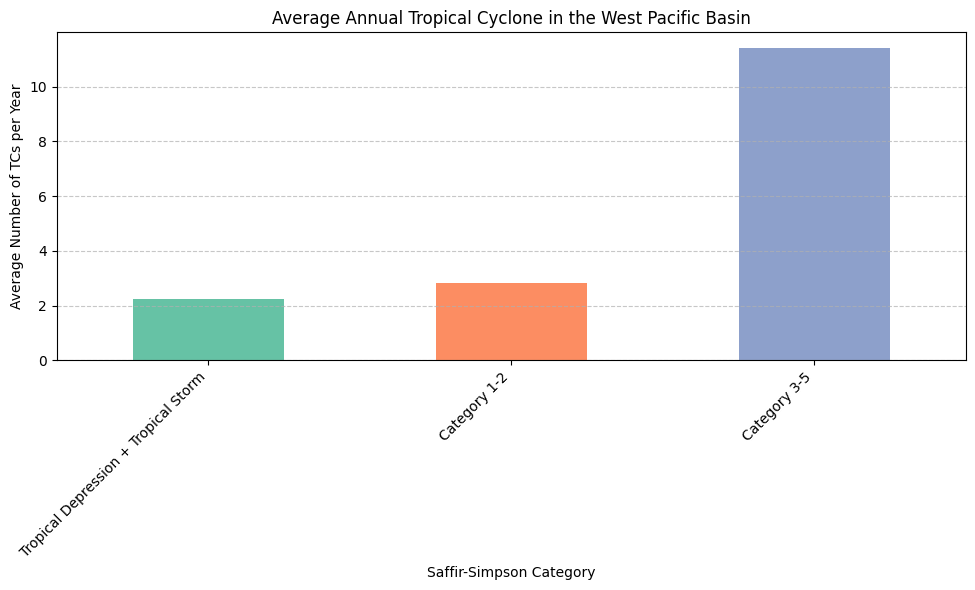

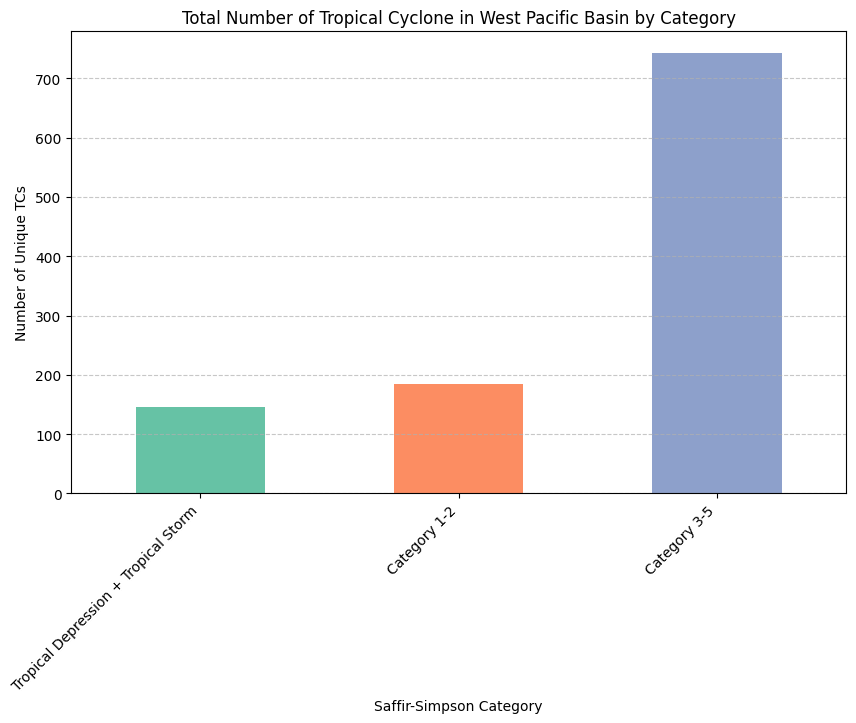

In [125]:
def categorize_tc(wind_speed):
    if wind_speed <= 32:
        return "Tropical Depression + Tropical Storm"
    elif 33 <= wind_speed <= 49:
        return "Category 1-2"
    elif wind_speed >= 50:
        return "Category 3-5"

tc_points['category'] = tc_points['USA_WIND'].apply(categorize_tc)


# For each TC, find the maximum wind speed to assign a single category
tc_max_wind = tc_points.groupby('SID').agg({
    'USA_WIND': 'max'
}).reset_index()
tc_max_wind['category'] = tc_max_wind['USA_WIND'].apply(categorize_tc)

# Count unique TCs in each category
landfall_counts1 = tc_max_wind['category'].value_counts().reindex([
    "Tropical Depression + Tropical Storm",
    "Category 1-2",
    "Category 3-5"
], fill_value=0)

total_years = 2014 - 1950 + 1  # 65 years
avg_tcs_per_year1 = landfall_counts1 / total_years
print("\nAverage number of tropical cyclone in West Pacific Basin per year by category:")
for category, avg in avg_tcs_per_year1.items():
    print(f"{category}: {avg:.2f}")

# Print results
print("Number of unique tropical cyclones in West Pacific Basin by category:")
for category, count in landfall_counts1.items():
    print(f"{category}: {count}")

# Plot bar chart for average TCs per year
plt.figure(figsize=(10, 6))
avg_tcs_per_year1.plot(kind='bar', color=['#66c2a5', '#fc8d62', '#8da0cb'])
plt.title('Average Annual Tropical Cyclone in the West Pacific Basin')
plt.xlabel('Saffir-Simpson Category')
plt.ylabel('Average Number of TCs per Year')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Plot bar chart
plt.figure(figsize=(10, 6))
landfall_counts1.plot(kind='bar', color=['#66c2a5', '#fc8d62', '#8da0cb'])
plt.title('Total Number of Tropical Cyclone in West Pacific Basin by Category')
plt.xlabel('Saffir-Simpson Category')
plt.ylabel('Number of Unique TCs')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [126]:
# Save data to CSV
data = []
categories = [
    "Tropical Depression + Tropical Storm",
    "Category 1-2",
    "Category 3-5"
]

for dataset, counts, avg in [
    ("IBTRACS", landfall_counts1, avg_tcs_per_year1)
]:
    for category in categories:
        data.append({
            'Dataset': dataset,
            'Category': category,
            'Total_Count': counts.get(category, 0),
            'Average_Per_Year': avg.get(category, 0)
        })
df = pd.DataFrame(data)
df.to_csv('Result of IBTRACS.csv', index=False)
print("\nData saved to 'Result of IBTRACS.csv'")


Data saved to 'Result of IBTRACS.csv'


In [127]:
avg_tcs_per_year1

,count
category,
Tropical Depression + Tropical Storm,2.246154
Category 1-2,2.830769
Category 3-5,11.415385


# **1.2 1980-2014**

In [128]:
tc_points = tc_points.to_crs(epsg=4326)

tc_points = tc_points[(tc_points['SEASON'] >= 1980) & (tc_points['SEASON'] <= 2014)]


Average number of tropical cyclone in West Pacific Basin per year by category:
Tropical Depression + Tropical Storm: 4.17
Category 1-2: 5.26
Category 3-5: 23.91
Number of unique tropical cyclones in West Pacific Basin by category:
Tropical Depression + Tropical Storm: 146
Category 1-2: 184
Category 3-5: 837


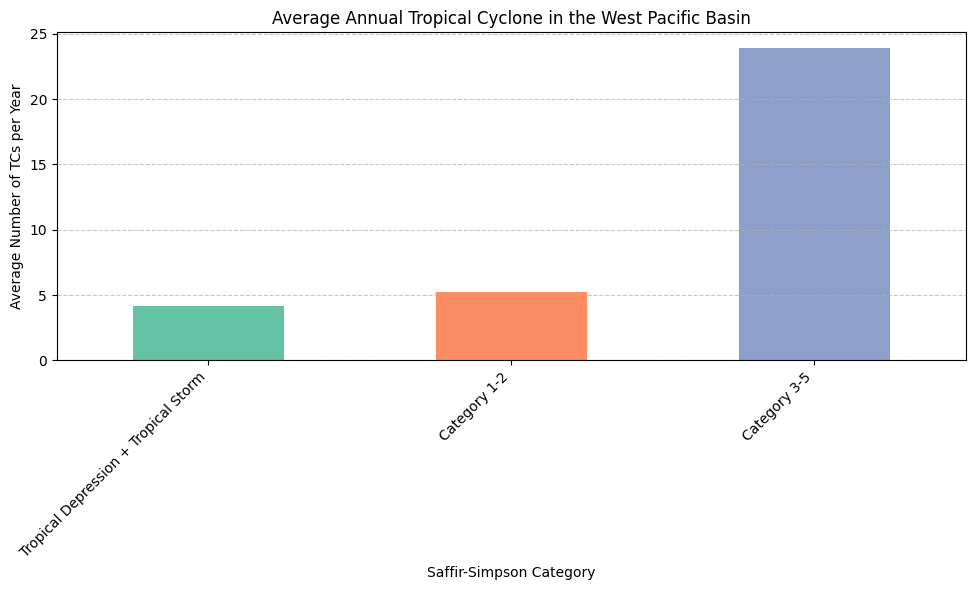

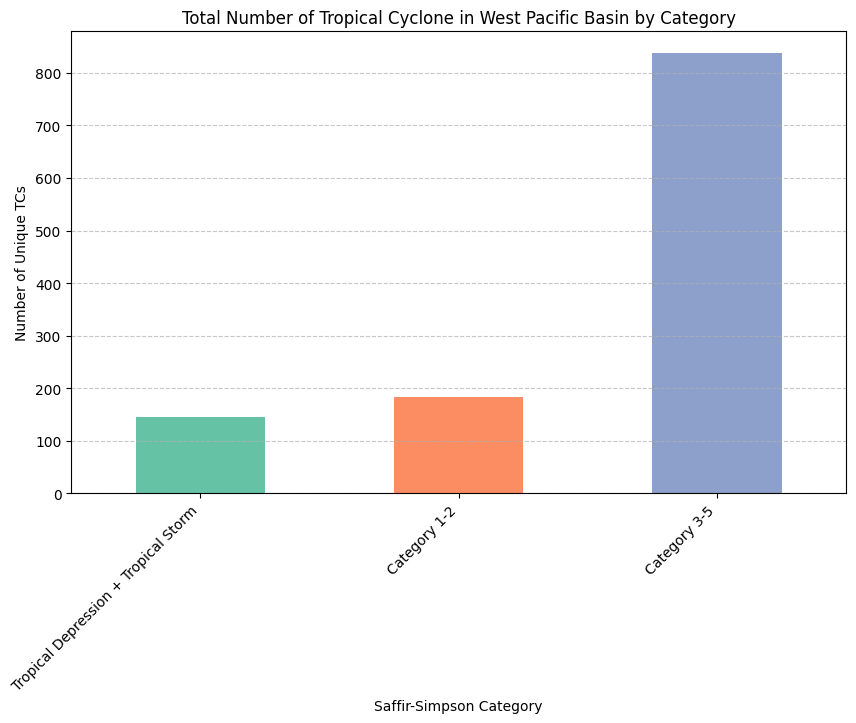

In [129]:
def categorize_tc(wind_speed):
    if wind_speed <= 32:
        return "Tropical Depression + Tropical Storm"
    elif 33 <= wind_speed <= 49:
        return "Category 1-2"
    else:  # wind_speed >= 50
        return "Category 3-5"

tc_points['category'] = tc_points['USA_WIND'].apply(categorize_tc)

# For each TC, find the maximum wind speed to assign a single category
tc_max_wind = tc_points.groupby('SID').agg({
    'USA_WIND': 'max'
}).reset_index()
tc_max_wind['category'] = tc_max_wind['USA_WIND'].apply(categorize_tc)

# Count unique TCs in each category
landfall_countsA = tc_max_wind['category'].value_counts().reindex([
    "Tropical Depression + Tropical Storm",
    "Category 1-2",
    "Category 3-5"
], fill_value=0)

total_years = 2014 - 1980 + 1
avg_tcs_per_yearA = landfall_countsA / total_years
print("\nAverage number of tropical cyclone in West Pacific Basin per year by category:")
for category, avg in avg_tcs_per_yearA.items():
    print(f"{category}: {avg:.2f}")

# Print results
print("Number of unique tropical cyclones in West Pacific Basin by category:")
for category, count in landfall_countsA.items():
    print(f"{category}: {count}")

# Plot bar chart for average TCs per year
plt.figure(figsize=(10, 6))
avg_tcs_per_yearA.plot(kind='bar', color=['#66c2a5', '#fc8d62', '#8da0cb'])
plt.title('Average Annual Tropical Cyclone in the West Pacific Basin')
plt.xlabel('Saffir-Simpson Category')
plt.ylabel('Average Number of TCs per Year')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Plot bar chart
plt.figure(figsize=(10, 6))
landfall_countsA.plot(kind='bar', color=['#66c2a5', '#fc8d62', '#8da0cb'])
plt.title('Total Number of Tropical Cyclone in West Pacific Basin by Category')
plt.xlabel('Saffir-Simpson Category')
plt.ylabel('Number of Unique TCs')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# **1.3 1980-2024**

In [130]:
tc_points = tc_points.to_crs(epsg=4326)

tc_points = tc_points[(tc_points['SEASON'] >= 1980) & (tc_points['SEASON'] <= 2024)]


Average number of tropical cyclone in West Pacific Basin per year by category:
Tropical Depression + Tropical Storm: 1.95
Category 1-2: 2.45
Category 3-5: 11.16
Number of unique tropical cyclones in West Pacific Basin by category:
Tropical Depression + Tropical Storm: 146
Category 1-2: 184
Category 3-5: 837


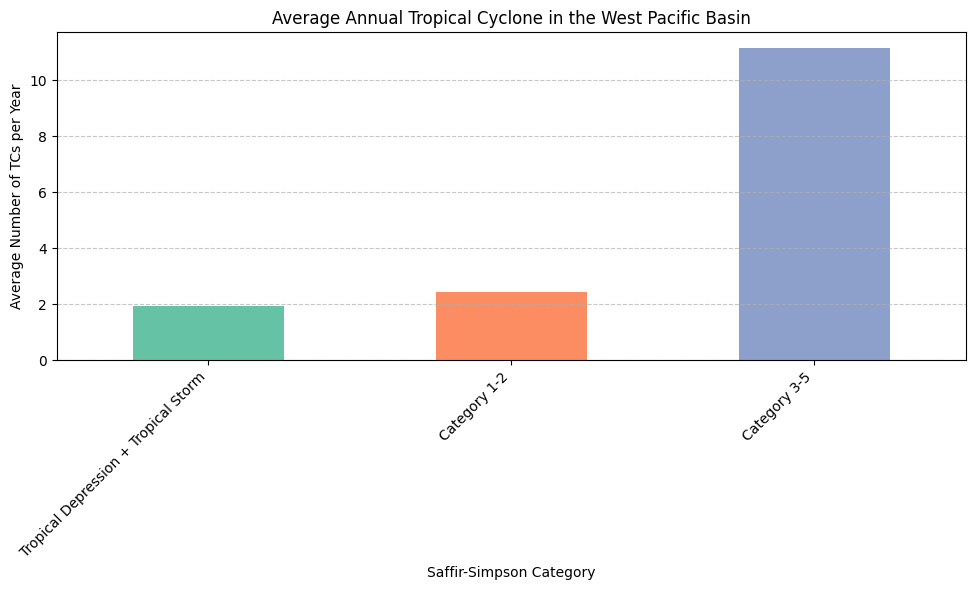

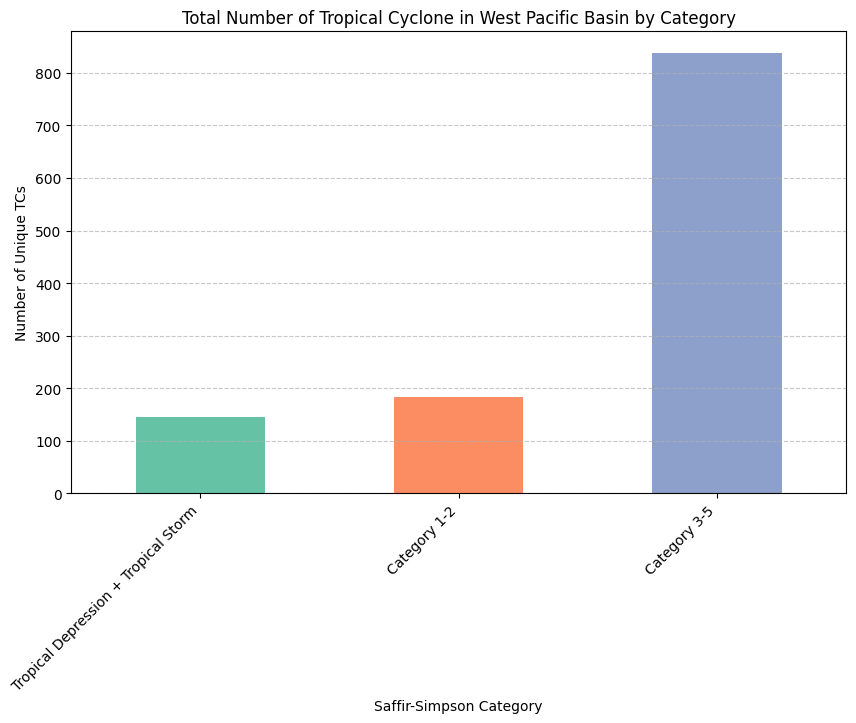

In [131]:
def categorize_tc(wind_speed):
    if wind_speed <= 32:
        return "Tropical Depression + Tropical Storm"
    elif 33 <= wind_speed <= 49:
        return "Category 1-2"
    else:  # wind_speed >= 50
        return "Category 3-5"

tc_points['category'] = tc_points['USA_WIND'].apply(categorize_tc)

# For each TC, find the maximum wind speed to assign a single category
tc_max_wind = tc_points.groupby('SID').agg({
    'USA_WIND': 'max'
}).reset_index()
tc_max_wind['category'] = tc_max_wind['USA_WIND'].apply(categorize_tc)

# Count unique TCs in each category
landfall_countsB = tc_max_wind['category'].value_counts().reindex([
    "Tropical Depression + Tropical Storm",
    "Category 1-2",
    "Category 3-5"
], fill_value=0)

total_years = 2024 - 1950 + 1
avg_tcs_per_yearB = landfall_countsB / total_years
print("\nAverage number of tropical cyclone in West Pacific Basin per year by category:")
for category, avg in avg_tcs_per_yearB.items():
    print(f"{category}: {avg:.2f}")

# Print results
print("Number of unique tropical cyclones in West Pacific Basin by category:")
for category, count in landfall_countsB.items():
    print(f"{category}: {count}")

# Plot bar chart for average TCs per year
plt.figure(figsize=(10, 6))
avg_tcs_per_yearB.plot(kind='bar', color=['#66c2a5', '#fc8d62', '#8da0cb'])
plt.title('Average Annual Tropical Cyclone in the West Pacific Basin')
plt.xlabel('Saffir-Simpson Category')
plt.ylabel('Average Number of TCs per Year')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Plot bar chart
plt.figure(figsize=(10, 6))
landfall_countsB.plot(kind='bar', color=['#66c2a5', '#fc8d62', '#8da0cb'])
plt.title('Total Number of Tropical Cyclone in West Pacific Basin by Category')
plt.xlabel('Saffir-Simpson Category')
plt.ylabel('Number of Unique TCs')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# **Compare above Result**

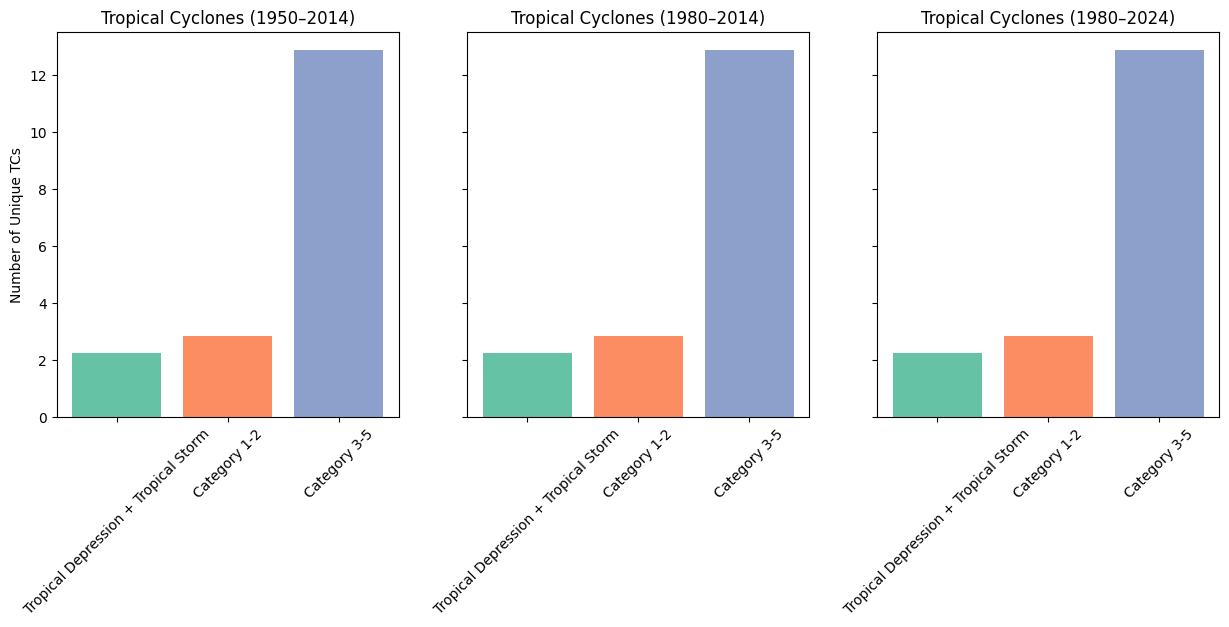

In [114]:
# Categories for plotting
categories = ["Tropical Depression + Tropical Storm", "Category 1-2", "Category 3-5"]

# Data for each time period
counts_1950_2014 = [avg_tcs_per_year1[cat] for cat in categories]
counts_1980_2014 = [avg_tcs_per_yearA[cat] for cat in categories]
counts_1980_2024 = [avg_tcs_per_yearB[cat] for cat in categories]

# Create three separate bar plots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

# Plot for 1950–2014
ax1.bar(categories, counts_1950_2014, color=['#66c2a5', '#fc8d62', '#8da0cb'])
ax1.set_title('Tropical Cyclones (1950–2014)')
ax1.set_ylabel('Number of Unique TCs')
ax1.tick_params(axis='x', rotation=45)

# Plot for 1980–2014
ax2.bar(categories, counts_1980_2014, color=['#66c2a5', '#fc8d62', '#8da0cb'])
ax2.set_title('Tropical Cyclones (1980–2014)')
ax2.tick_params(axis='x', rotation=45)

# Plot for 1980–2024
ax3.bar(categories, counts_1980_2024, color=['#66c2a5', '#fc8d62', '#8da0cb'])
ax3.set_title('Tropical Cyclones (1980–2024)')
ax3.tick_params(axis='x', rotation=45)

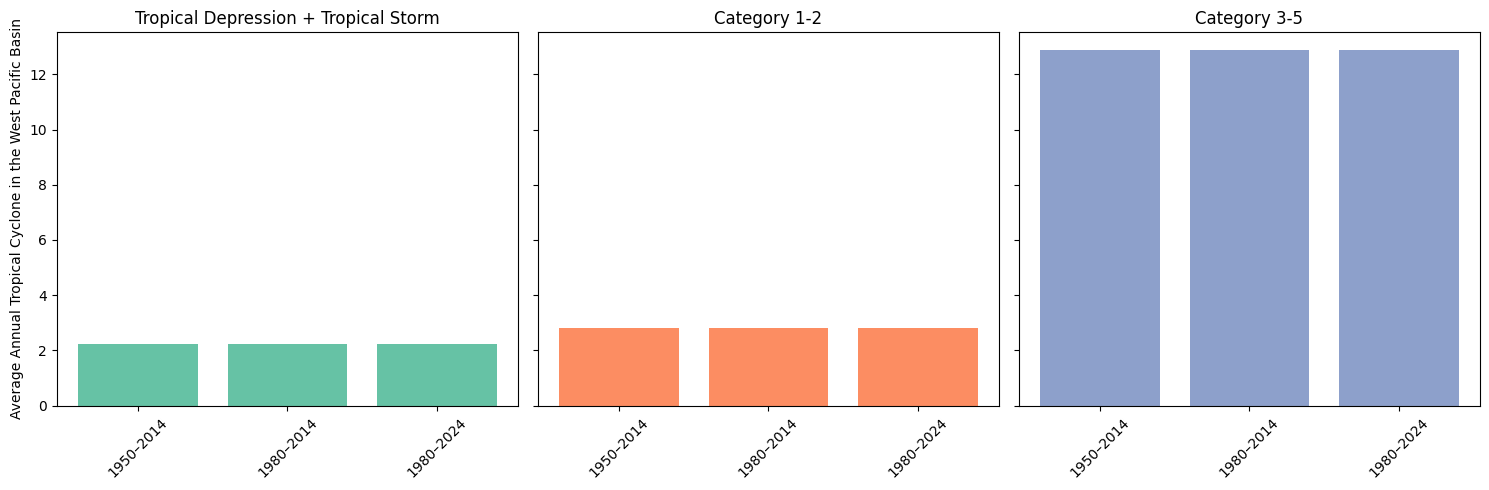

In [115]:
# Time periods for x-axis
time_periods = ["1950–2014", "1980–2014", "1980–2024"]

# Extract counts for each category across the three time periods
ts_td_counts = [
    avg_tcs_per_year1["Tropical Depression + Tropical Storm"],
    avg_tcs_per_yearA["Tropical Depression + Tropical Storm"],
    avg_tcs_per_yearB["Tropical Depression + Tropical Storm"]
]
cat1_2_counts = [
    avg_tcs_per_year1["Category 1-2"],
    avg_tcs_per_yearA["Category 1-2"],
    avg_tcs_per_yearB["Category 1-2"]
]
cat3_5_counts = [
    avg_tcs_per_year1["Category 3-5"],
    avg_tcs_per_yearA["Category 3-5"],
    avg_tcs_per_yearB["Category 3-5"]
]

# Create three separate bar plots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

# Plot for Tropical Depression + Tropical Storm
ax1.bar(time_periods, ts_td_counts, color='#66c2a5')
ax1.set_title('Tropical Depression + Tropical Storm')
ax1.set_ylabel('Average Annual Tropical Cyclone in the West Pacific Basin')
ax1.tick_params(axis='x', rotation=45)

# Plot for Category 1-2
ax2.bar(time_periods, cat1_2_counts, color='#fc8d62')
ax2.set_title('Category 1-2')
ax2.tick_params(axis='x', rotation=45)

# Plot for Category 3-5
ax3.bar(time_periods, cat3_5_counts, color='#8da0cb')
ax3.set_title('Category 3-5')
ax3.tick_params(axis='x', rotation=45)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

# **2.1 TempExt**

# **2.1.1 MPI-ESM1-2-XR**

# **highresSST-present**

In [50]:
# Define file paths
tc_shapefile = "MPI-ESM1-2-XR_highresSST-present_r1i1p1f1_gn_track_nodes_WP.shp"

# Load the shapefiles
tc_tracks = gpd.read_file(tc_shapefile)

In [51]:
tc_tracks

,TRACK_ID,lat,lon,sfcWind,psl,time,experiment,Gust_1min,Category,geometry
0,20,15.214551,138.281250,11.011260,1007.794983,1952-08-22,MPI-ESM1-2-XR_highresSST-present_r1i1p1f1_gn,14.094413,0,POINT (138.28125 15.21455)
1,20,15.682691,137.343750,11.296300,1010.198975,1952-08-22,MPI-ESM1-2-XR_highresSST-present_r1i1p1f1_gn,14.459264,0,POINT (137.34375 15.68269)
2,20,14.746411,136.875000,10.804310,1008.281982,1952-08-22,MPI-ESM1-2-XR_highresSST-present_r1i1p1f1_gn,13.829516,0,POINT (136.875 14.74641)
3,20,15.682691,135.937500,10.669180,1010.085022,1952-08-23,MPI-ESM1-2-XR_highresSST-present_r1i1p1f1_gn,13.656550,0,POINT (135.9375 15.68269)
4,20,16.150831,134.531250,11.943130,1007.046997,1952-08-23,MPI-ESM1-2-XR_highresSST-present_r1i1p1f1_gn,15.287206,0,POINT (134.53125 16.15083)
...,...,...,...,...,...,...,...,...,...,...
569,340,27.854330,121.875000,14.420240,1006.153015,2012-09-02,MPI-ESM1-2-XR_highresSST-present_r1i1p1f1_gn,18.457907,0,POINT (121.875 27.85433)
570,340,28.322472,121.406250,15.789090,1007.070007,2012-09-02,MPI-ESM1-2-XR_highresSST-present_r1i1p1f1_gn,20.210035,0,POINT (121.40625 28.32247)
571,340,28.790611,121.406250,16.555059,1006.452026,2012-09-02,MPI-ESM1-2-XR_highresSST-present_r1i1p1f1_gn,21.190475,0,POINT (121.40625 28.79061)
572,340,29.960960,121.640625,16.021429,1007.232971,2012-09-03,MPI-ESM1-2-XR_highresSST-present_r1i1p1f1_gn,20.507429,0,POINT (121.64062 29.96096)



Average number of tropical cyclone in West Pacific Basin per year:
Tropical Depression + Tropical Storm: 0.34
Category 1-2: 0.02
Category 3-5: 0.00
Number of unique tropical cyclones in the West Pacific Basin by category:
Tropical Depression + Tropical Storm: 22
Category 1-2: 1
Category 3-5: 0


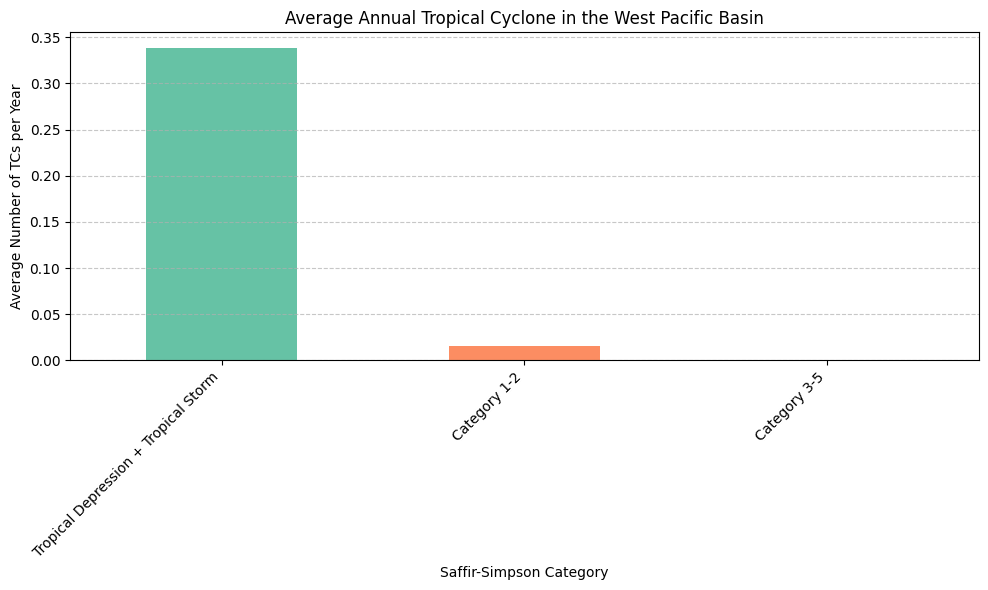

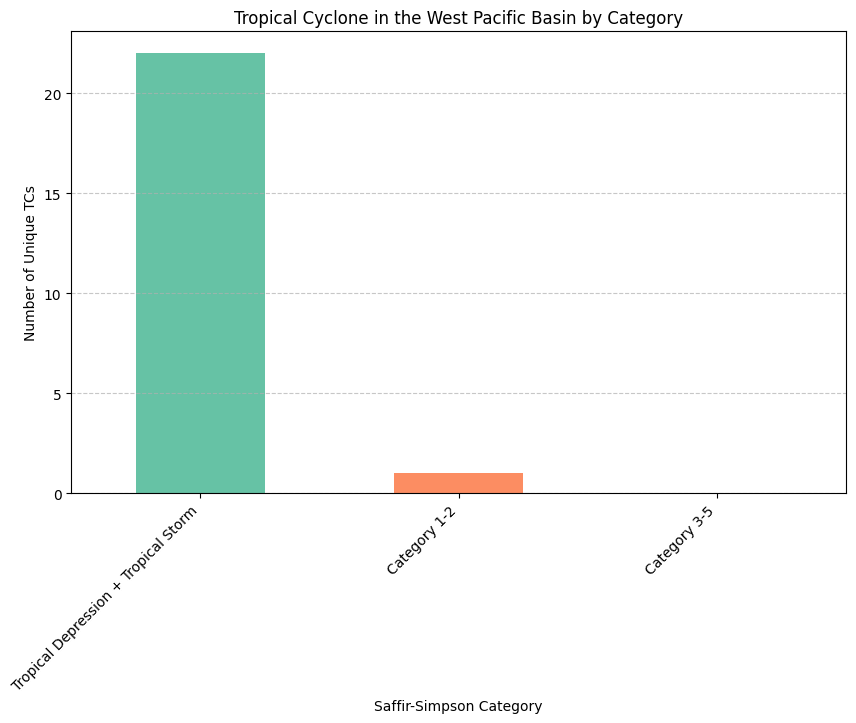

In [52]:
# Function to categorize TCs based on Saffir-Simpson scale (wind speed in m/s)
def categorize_tc(wind_speed):
    if wind_speed <= 32:
        return "Tropical Depression + Tropical Storm"
    elif 33 <= wind_speed <= 49:
        return "Category 1-2"
    else:  # wind_speed >= 50
        return "Category 3-5"

# Apply categorization to landfall nodes
tc_tracks['category'] = tc_tracks['Gust_1min'].apply(categorize_tc)

# For each TC, find the maximum wind speed at landfall to assign a single category
tc_max_wind = tc_tracks.groupby('TRACK_ID').agg({
    'Gust_1min': 'max'
}).reset_index()
tc_max_wind['category'] = tc_max_wind['Gust_1min'].apply(categorize_tc)

# Count unique TCs in each category
landfall_counts2 = tc_max_wind['category'].value_counts().reindex([
    "Tropical Depression + Tropical Storm",
    "Category 1-2",
    "Category 3-5"
], fill_value=0)

# Count unique TCs that make landfall
unique_landfall_tcs = tc_tracks['TRACK_ID'].nunique()

total_years = 2014 - 1950 + 1  # 65 years
avg_tcs_per_year2 = landfall_counts2 / total_years

print("\nAverage number of tropical cyclone in West Pacific Basin per year:")
for category, avg in avg_tcs_per_year2.items():
    print(f"{category}: {avg:.2f}")

print("Number of unique tropical cyclones in the West Pacific Basin by category:")
for category, count in landfall_counts2.items():
    print(f"{category}: {count}")

# Plot bar chart for average TCs per year
plt.figure(figsize=(10, 6))
avg_tcs_per_year2.plot(kind='bar', color=['#66c2a5', '#fc8d62', '#8da0cb'])
plt.title('Average Annual Tropical Cyclone in the West Pacific Basin')
plt.xlabel('Saffir-Simpson Category')
plt.ylabel('Average Number of TCs per Year')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()


# Plot bar chart
plt.figure(figsize=(10, 6))
landfall_counts2.plot(kind='bar', color=['#66c2a5', '#fc8d62', '#8da0cb'])
plt.title('Tropical Cyclone in the West Pacific Basin by Category')
plt.xlabel('Saffir-Simpson Category')
plt.ylabel('Number of Unique TCs')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


# **hist-1950**

In [53]:
# Define file paths
tc_shapefile = "MPI-ESM1-2-XR_hist-1950_r1i1p1f1_gn_track_nodes_WP.shp"

# Load the shapefiles
tc_tracks = gpd.read_file(tc_shapefile)


Average number of tropical cyclone in West Pacific Basin per year:
Tropical Depression + Tropical Storm: 0.32
Category 1-2: 0.02
Category 3-5: 0.00
Number of unique tropical cyclones in the West Pacific Basin by category:
Tropical Depression + Tropical Storm: 21
Category 1-2: 1
Category 3-5: 0


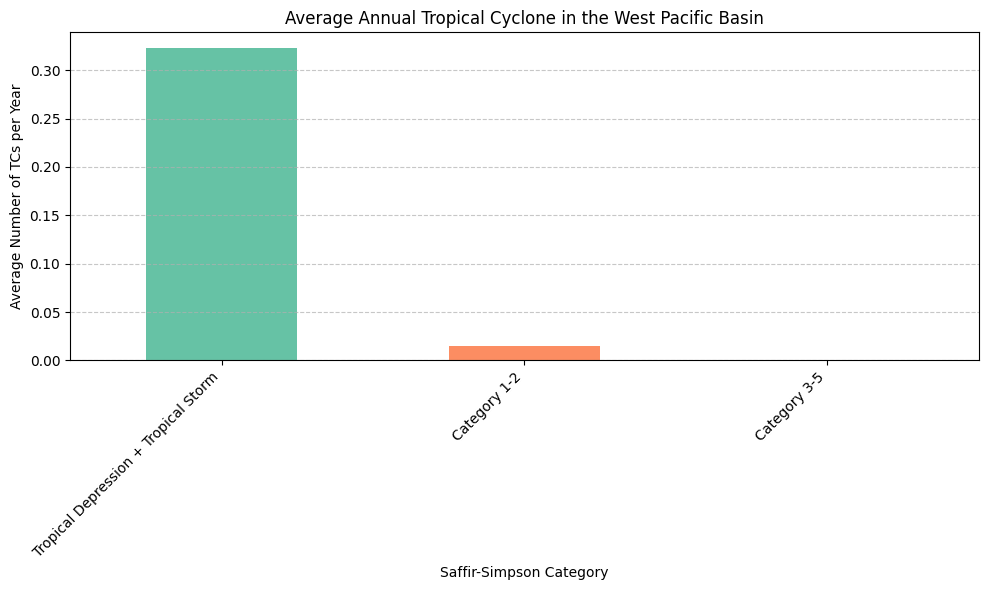

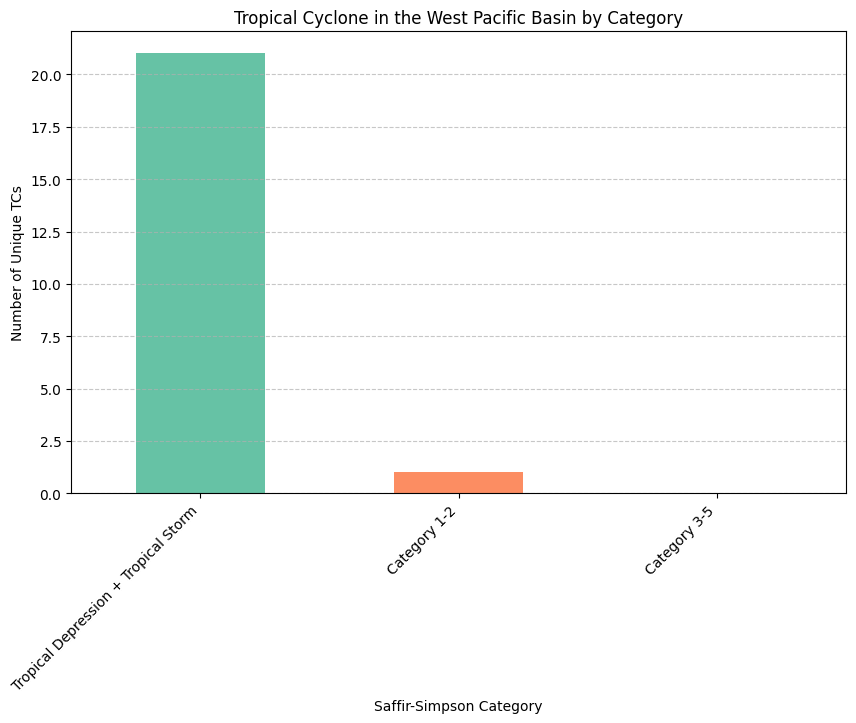

In [54]:
# Function to categorize TCs based on Saffir-Simpson scale (wind speed in m/s)
def categorize_tc(wind_speed):
    if wind_speed <= 32:
        return "Tropical Depression + Tropical Storm"
    elif 33 <= wind_speed <= 49:
        return "Category 1-2"
    else:  # wind_speed >= 50
        return "Category 3-5"

# Apply categorization to landfall nodes
tc_tracks['category'] = tc_tracks['Gust_1min'].apply(categorize_tc)

# For each TC, find the maximum wind speed  to assign a single category
tc_max_wind = tc_tracks.groupby('TRACK_ID').agg({
    'Gust_1min': 'max'
}).reset_index()
tc_max_wind['category'] = tc_max_wind['Gust_1min'].apply(categorize_tc)

# Count unique TCs in each category
landfall_counts3 = tc_max_wind['category'].value_counts().reindex([
    "Tropical Depression + Tropical Storm",
    "Category 1-2",
    "Category 3-5"
], fill_value=0)

# Count unique TCs
unique_landfall_tcs = tc_tracks['TRACK_ID'].nunique()

total_years = 2014 - 1950 + 1  # 65 years
avg_tcs_per_year3 = landfall_counts3 / total_years

print("\nAverage number of tropical cyclone in West Pacific Basin per year:")
for category, avg in avg_tcs_per_year3.items():
    print(f"{category}: {avg:.2f}")

print("Number of unique tropical cyclones in the West Pacific Basin by category:")
for category, count in landfall_counts3.items():
    print(f"{category}: {count}")

# Plot bar chart for average TCs per year
plt.figure(figsize=(10, 6))
avg_tcs_per_year3.plot(kind='bar', color=['#66c2a5', '#fc8d62', '#8da0cb'])
plt.title('Average Annual Tropical Cyclone in the West Pacific Basin')
plt.xlabel('Saffir-Simpson Category')
plt.ylabel('Average Number of TCs per Year')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()


# Plot bar chart
plt.figure(figsize=(10, 6))
landfall_counts3.plot(kind='bar', color=['#66c2a5', '#fc8d62', '#8da0cb'])
plt.title('Tropical Cyclone in the West Pacific Basin by Category')
plt.xlabel('Saffir-Simpson Category')
plt.ylabel('Number of Unique TCs')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


# **Result of MPI-ESM1-2-XR**

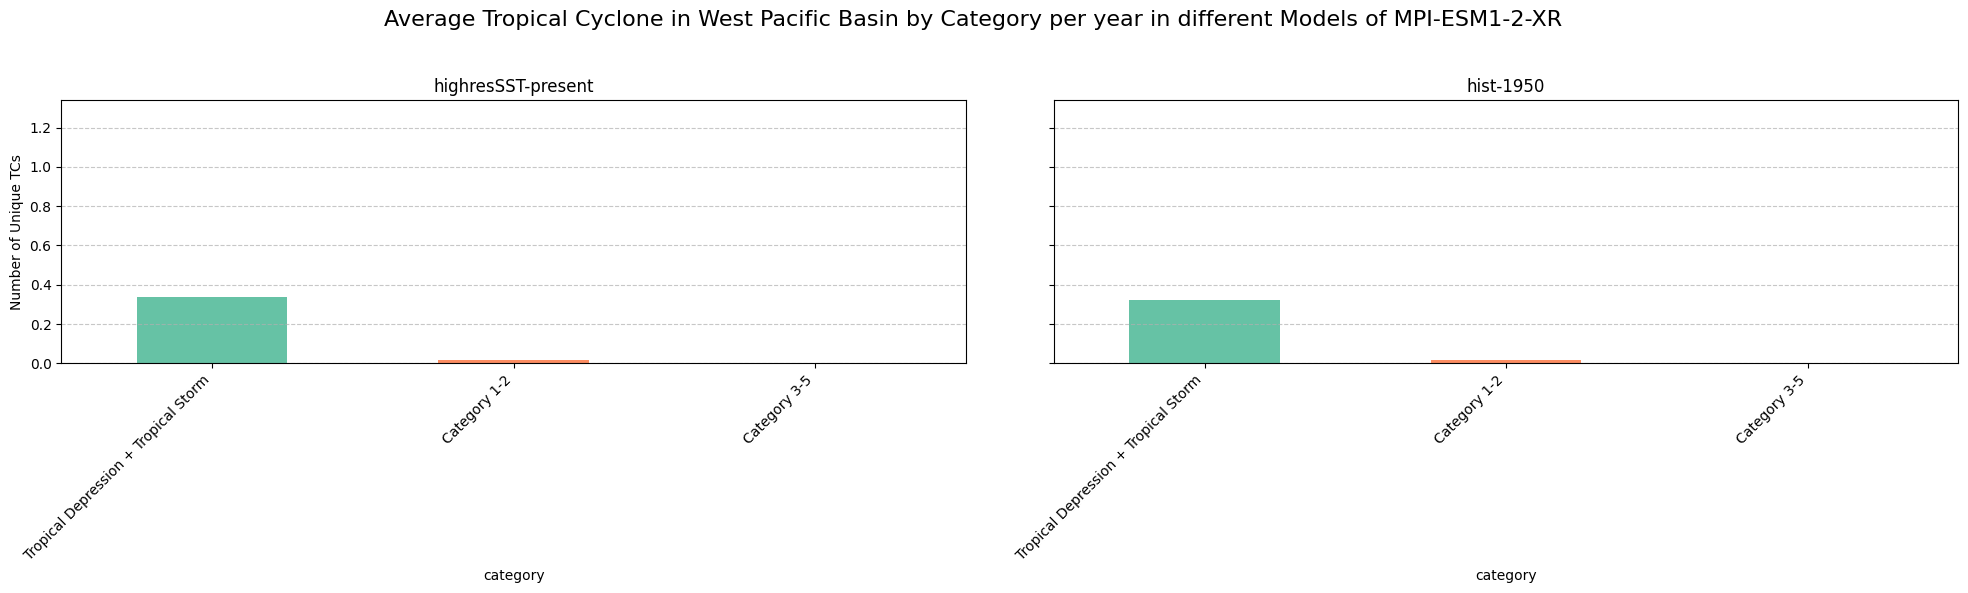

In [55]:
avg_landfall_counts_list = [
    (avg_tcs_per_year2, "highresSST-present"),
    (avg_tcs_per_year3, "hist-1950")
]

# Create subplots (1 row, 4 columns)
fig, axes = plt.subplots(1, 2, figsize=(20, 6), sharey=True)

# Colors for consistency across subplots
colors = ['#66c2a5', '#fc8d62', '#8da0cb']

# Find the maximum y value for consistent y-axis limits
max_y = max([counts.max() for counts, _ in avg_landfall_counts_list])

# Plot each bar chart
for i, (counts, label) in enumerate(avg_landfall_counts_list):
    counts.plot(kind='bar', ax=axes[i], color=colors)
    axes[i].set_title(label)
    axes[i].set_ylabel('Number of Unique TCs' if i == 0 else '')
    axes[i].set_xticklabels(counts.index, rotation=45, ha='right')
    axes[i].set_ylim(0, max_y + 1)  # Consistent y-axis limits
    axes[i].grid(axis='y', linestyle='--', alpha=0.7)

# Add a super title
plt.suptitle('Average Tropical Cyclone in West Pacific Basin by Category per year in different Models of MPI-ESM1-2-XR', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust for suptitle
plt.show()

In [56]:
# Save data to CSV
data = []
categories = [
    "Tropical Depression + Tropical Storm",
    "Category 1-2",
    "Category 3-5"
]

for dataset, counts, avg in [
    ("highresSST-present", landfall_counts2, avg_tcs_per_year2),
    ("hist-1950", landfall_counts3, avg_tcs_per_year3)
]:
    for category in categories:
        data.append({
            'Dataset': dataset,
            'Category': category,
            'Total_Count': counts.get(category, 0),
            'Average_Per_Year': avg.get(category, 0)
        })
df = pd.DataFrame(data)
df.to_csv('Result of MPI-ESM1-2-XR.csv', index=False)
print("\nData saved to 'Result of MPI-ESM1-2-XR.csv'")


Data saved to 'Result of MPI-ESM1-2-XR.csv'


# **2.1.2 HadGem3-GC31-HH**

# **hist-1950**

In [57]:
# Define file paths
tc_shapefile = "HadGEM3-GC31-HH_hist-1950_r1i1p1f1_gn_track_nodes_WP.shp"

# Load the shapefiles
tc_tracks = gpd.read_file(tc_shapefile)


Average number of tropical cyclone in West Pacific Basin per year:
Tropical Depression + Tropical Storm: 2.91
Category 1-2: 2.03
Category 3-5: 0.35
Number of unique tropical cyclones in the West Pacific Basin by category:
Tropical Depression + Tropical Storm: 189
Category 1-2: 132
Category 3-5: 23


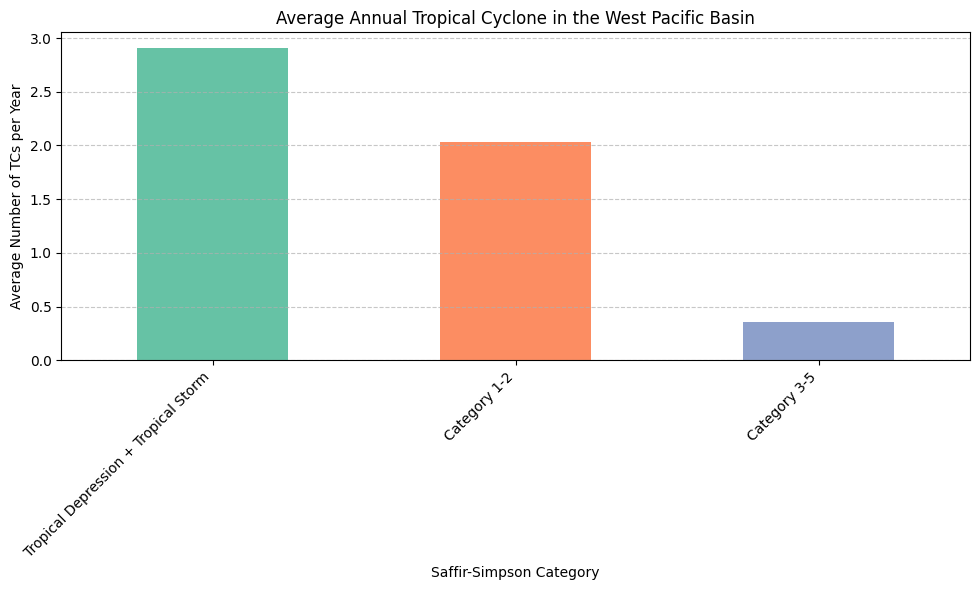

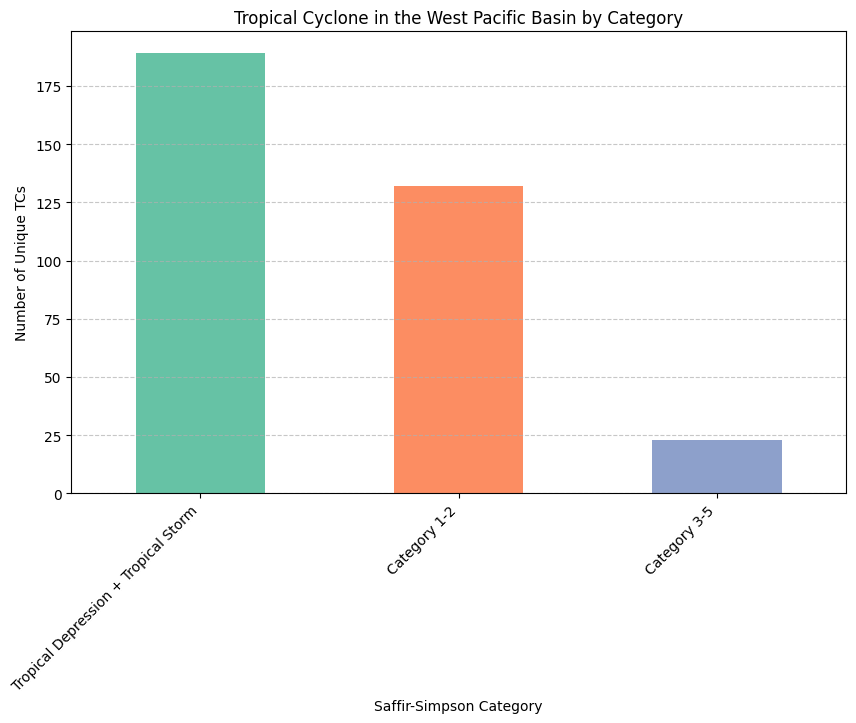

In [58]:
# Function to categorize TCs based on Saffir-Simpson scale (wind speed in m/s)
def categorize_tc(wind_speed):
    if wind_speed <= 32:
        return "Tropical Depression + Tropical Storm"
    elif 33 <= wind_speed <= 49:
        return "Category 1-2"
    else:  # wind_speed >= 50
        return "Category 3-5"

# Apply categorization
tc_tracks['category'] = tc_tracks['Gust_1min'].apply(categorize_tc)

# For each TC, find the maximum wind speed  to assign a single category
tc_max_wind = tc_tracks.groupby('TRACK_ID').agg({
    'Gust_1min': 'max'
}).reset_index()
tc_max_wind['category'] = tc_max_wind['Gust_1min'].apply(categorize_tc)

# Count unique TCs in each category
landfall_counts4 = tc_max_wind['category'].value_counts().reindex([
    "Tropical Depression + Tropical Storm",
    "Category 1-2",
    "Category 3-5"
], fill_value=0)

# Count unique TCs
unique_landfall_tcs = tc_tracks['TRACK_ID'].nunique()

total_years = 2014 - 1950 + 1  # 65 years
avg_tcs_per_year4 = landfall_counts4 / total_years

print("\nAverage number of tropical cyclone in West Pacific Basin per year:")
for category, avg in avg_tcs_per_year4.items():
    print(f"{category}: {avg:.2f}")

print("Number of unique tropical cyclones in the West Pacific Basin by category:")
for category, count in landfall_counts4.items():
    print(f"{category}: {count}")

# Plot bar chart for average TCs per year
plt.figure(figsize=(10, 6))
avg_tcs_per_year4.plot(kind='bar', color=['#66c2a5', '#fc8d62', '#8da0cb'])
plt.title('Average Annual Tropical Cyclone in the West Pacific Basin')
plt.xlabel('Saffir-Simpson Category')
plt.ylabel('Average Number of TCs per Year')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()


# Plot bar chart
plt.figure(figsize=(10, 6))
landfall_counts4.plot(kind='bar', color=['#66c2a5', '#fc8d62', '#8da0cb'])
plt.title('Tropical Cyclone in the West Pacific Basin by Category')
plt.xlabel('Saffir-Simpson Category')
plt.ylabel('Number of Unique TCs')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


# **Result of HadGem3-GC31-HH**

In [59]:
# Save data to CSV
data = []
categories = [
    "Tropical Depression + Tropical Storm",
    "Category 1-2",
    "Category 3-5"
]
for dataset, counts, avg in [
    ("hist-1950", landfall_counts4, avg_tcs_per_year4)
]:
    for category in categories:
        data.append({
            'Dataset': dataset,
            'Category': category,
            'Total_Count': counts.get(category, 0),
            'Average_Per_Year': avg.get(category, 0)
        })
df = pd.DataFrame(data)
df.to_csv('Result of HadGem3-GC31-HH.csv', index=False)
print("\nData saved to 'Result of HadGem3-GC31-HH.csv'")



Data saved to 'Result of HadGem3-GC31-HH.csv'


# **2.1.3 ECMWF-IFS-HR**

# **highresSST-present**

**Round 1**

In [60]:
# Define file paths
tc_shapefile = "ECMWF-IFS-HR_highresSST-present_r1i1p1f1_gr_track_nodes_WP.shp"

# Load the shapefiles
tc_tracks = gpd.read_file(tc_shapefile)


Average number of tropical cyclone in West Pacific Basin per year:
Tropical Depression + Tropical Storm: 2.68
Category 1-2: 1.20
Category 3-5: 0.29
Number of unique tropical cyclones in the West Pacific Basin by category:
Tropical Depression + Tropical Storm: 174
Category 1-2: 78
Category 3-5: 19


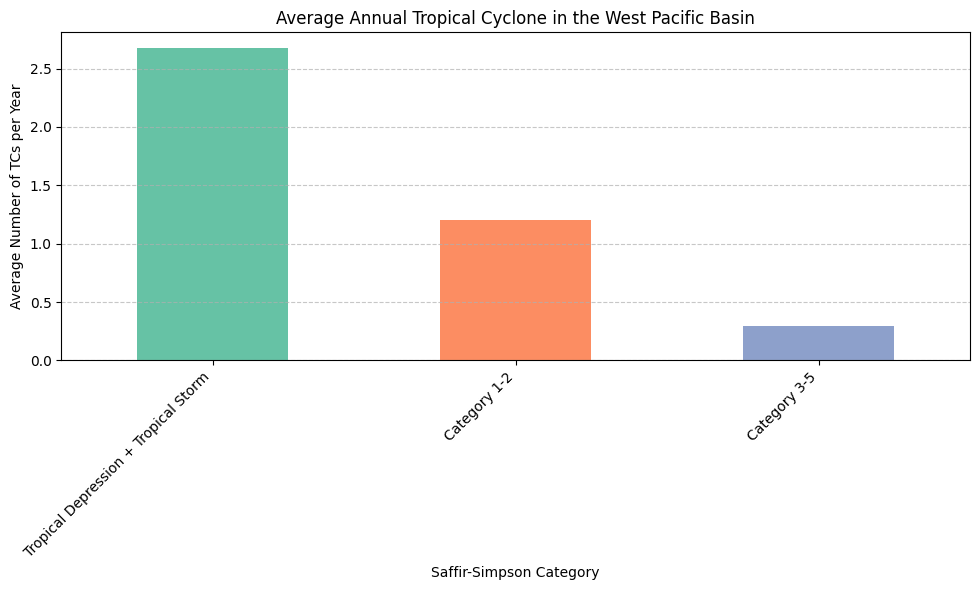

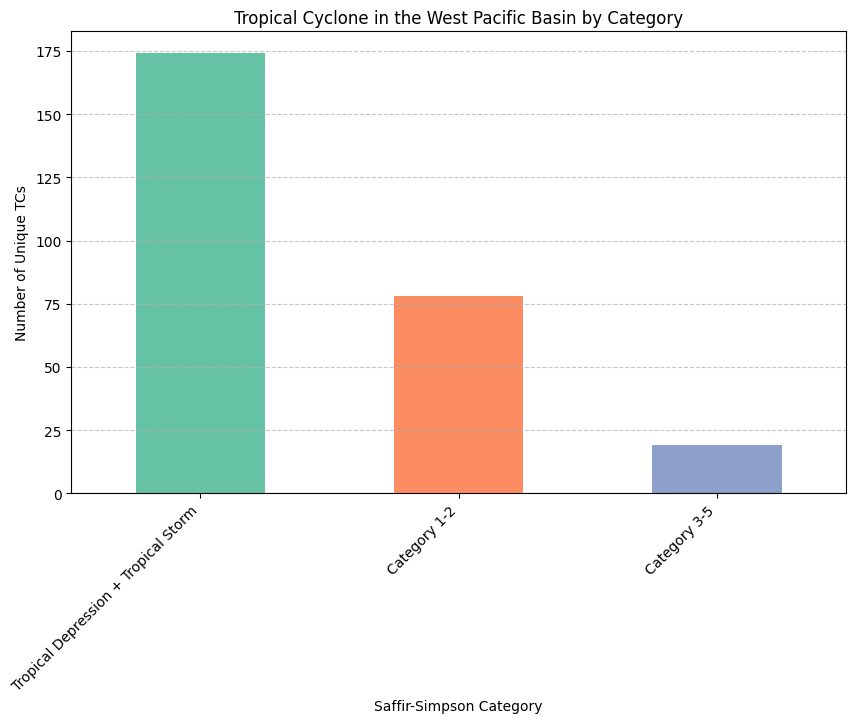

In [61]:
# Function to categorize TCs based on Saffir-Simpson scale (wind speed in m/s)
def categorize_tc(wind_speed):
    if wind_speed <= 32:
        return "Tropical Depression + Tropical Storm"
    elif 33 <= wind_speed <= 49:
        return "Category 1-2"
    else:  # wind_speed >= 50
        return "Category 3-5"

# Apply categorization
tc_tracks['category'] = tc_tracks['Gust_1min'].apply(categorize_tc)

# For each TC, find the maximum wind speed  to assign a single category
tc_max_wind = tc_tracks.groupby('TRACK_ID').agg({
    'Gust_1min': 'max'
}).reset_index()
tc_max_wind['category'] = tc_max_wind['Gust_1min'].apply(categorize_tc)

# Count unique TCs in each category
landfall_counts5 = tc_max_wind['category'].value_counts().reindex([
    "Tropical Depression + Tropical Storm",
    "Category 1-2",
    "Category 3-5"
], fill_value=0)

# Count unique TCs
unique_landfall_tcs = tc_tracks['TRACK_ID'].nunique()

total_years = 2014 - 1950 + 1  # 65 years
avg_tcs_per_year5 = landfall_counts5 / total_years

print("\nAverage number of tropical cyclone in West Pacific Basin per year:")
for category, avg in avg_tcs_per_year5.items():
    print(f"{category}: {avg:.2f}")

print("Number of unique tropical cyclones in the West Pacific Basin by category:")
for category, count in landfall_counts5.items():
    print(f"{category}: {count}")

# Plot bar chart for average TCs per year
plt.figure(figsize=(10, 6))
avg_tcs_per_year5.plot(kind='bar', color=['#66c2a5', '#fc8d62', '#8da0cb'])
plt.title('Average Annual Tropical Cyclone in the West Pacific Basin')
plt.xlabel('Saffir-Simpson Category')
plt.ylabel('Average Number of TCs per Year')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()


# Plot bar chart
plt.figure(figsize=(10, 6))
landfall_counts5.plot(kind='bar', color=['#66c2a5', '#fc8d62', '#8da0cb'])
plt.title('Tropical Cyclone in the West Pacific Basin by Category')
plt.xlabel('Saffir-Simpson Category')
plt.ylabel('Number of Unique TCs')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


**Round 5**

In [62]:
# Define file paths
tc_shapefile = "ECMWF-IFS-HR_highresSST-present_r5i1p1f1_gr_track_nodes_WP.shp"

# Load the shapefiles
tc_tracks = gpd.read_file(tc_shapefile)


Average number of tropical cyclone in West Pacific Basin per year:
Tropical Depression + Tropical Storm: 2.72
Category 1-2: 1.23
Category 3-5: 0.20
Number of unique tropical cyclones in the West Pacific Basin by category:
Tropical Depression + Tropical Storm: 177
Category 1-2: 80
Category 3-5: 13


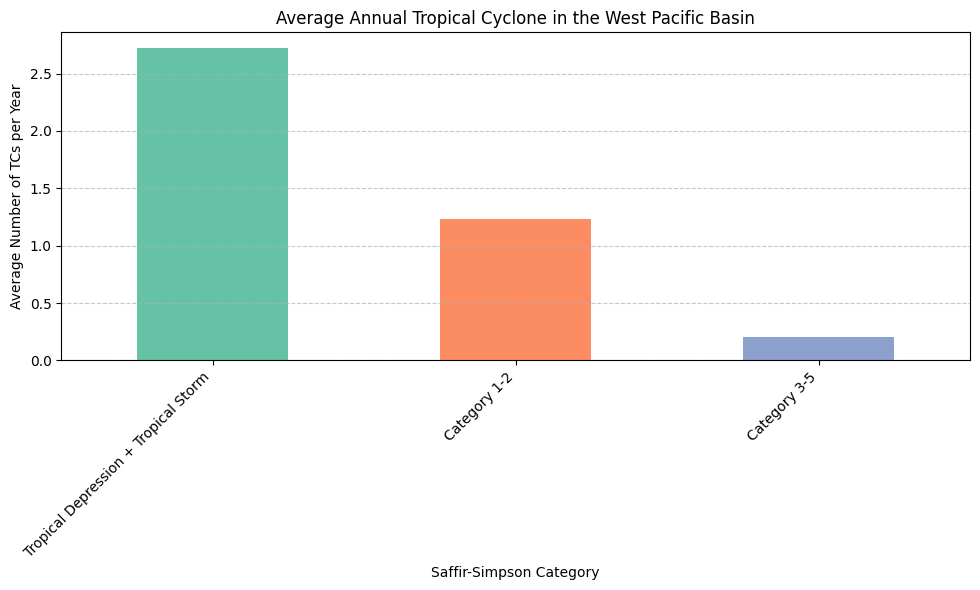

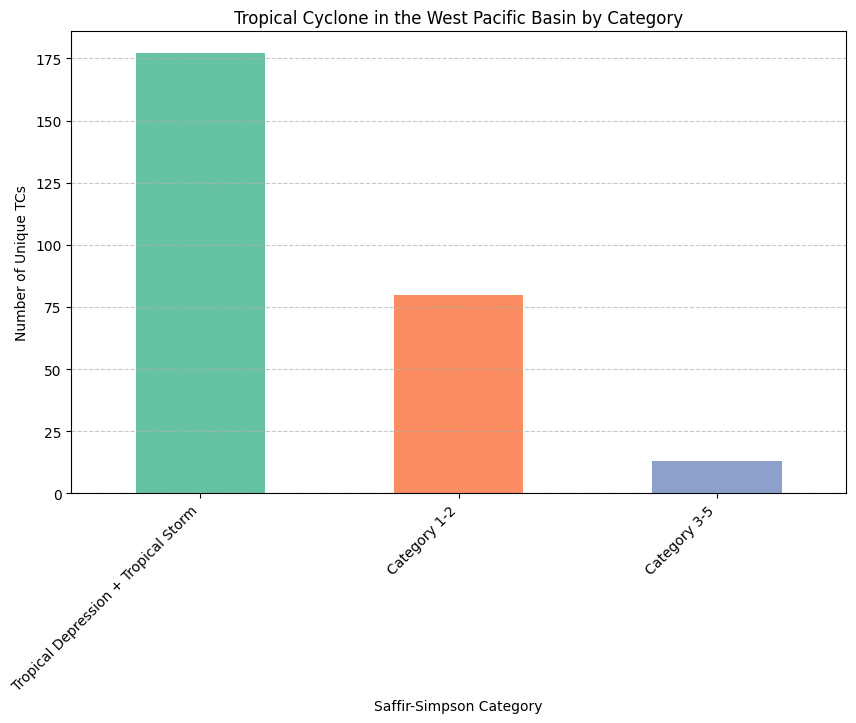

In [63]:
# Function to categorize TCs based on Saffir-Simpson scale (wind speed in m/s)
def categorize_tc(wind_speed):
    if wind_speed <= 32:
        return "Tropical Depression + Tropical Storm"
    elif 33 <= wind_speed <= 49:
        return "Category 1-2"
    else:  # wind_speed >= 50
        return "Category 3-5"

# Apply categorization
tc_tracks['category'] = tc_tracks['Gust_1min'].apply(categorize_tc)

# For each TC, find the maximum wind speed  to assign a single category
tc_max_wind = tc_tracks.groupby('TRACK_ID').agg({
    'Gust_1min': 'max'
}).reset_index()
tc_max_wind['category'] = tc_max_wind['Gust_1min'].apply(categorize_tc)

# Count unique TCs in each category
landfall_counts6 = tc_max_wind['category'].value_counts().reindex([
    "Tropical Depression + Tropical Storm",
    "Category 1-2",
    "Category 3-5"
], fill_value=0)

# Count unique TCs
unique_landfall_tcs = tc_tracks['TRACK_ID'].nunique()

total_years = 2014 - 1950 + 1  # 65 years
avg_tcs_per_year6 = landfall_counts6 / total_years

print("\nAverage number of tropical cyclone in West Pacific Basin per year:")
for category, avg in avg_tcs_per_year6.items():
    print(f"{category}: {avg:.2f}")

print("Number of unique tropical cyclones in the West Pacific Basin by category:")
for category, count in landfall_counts6.items():
    print(f"{category}: {count}")

# Plot bar chart for average TCs per year
plt.figure(figsize=(10, 6))
avg_tcs_per_year6.plot(kind='bar', color=['#66c2a5', '#fc8d62', '#8da0cb'])
plt.title('Average Annual Tropical Cyclone in the West Pacific Basin')
plt.xlabel('Saffir-Simpson Category')
plt.ylabel('Average Number of TCs per Year')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()


# Plot bar chart
plt.figure(figsize=(10, 6))
landfall_counts6.plot(kind='bar', color=['#66c2a5', '#fc8d62', '#8da0cb'])
plt.title('Tropical Cyclone in the West Pacific Basin by Category')
plt.xlabel('Saffir-Simpson Category')
plt.ylabel('Number of Unique TCs')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**Round 6**

In [64]:
# Define file paths
tc_shapefile = "ECMWF-IFS-HR_highresSST-present_r6i1p1f1_gr_track_nodes_WP.shp"

# Load the shapefiles
tc_tracks = gpd.read_file(tc_shapefile)


Average number of tropical cyclone in West Pacific Basin per year:
Tropical Depression + Tropical Storm: 2.26
Category 1-2: 1.35
Category 3-5: 0.25
Number of unique tropical cyclones in the West Pacific Basin by category:
Tropical Depression + Tropical Storm: 147
Category 1-2: 88
Category 3-5: 16


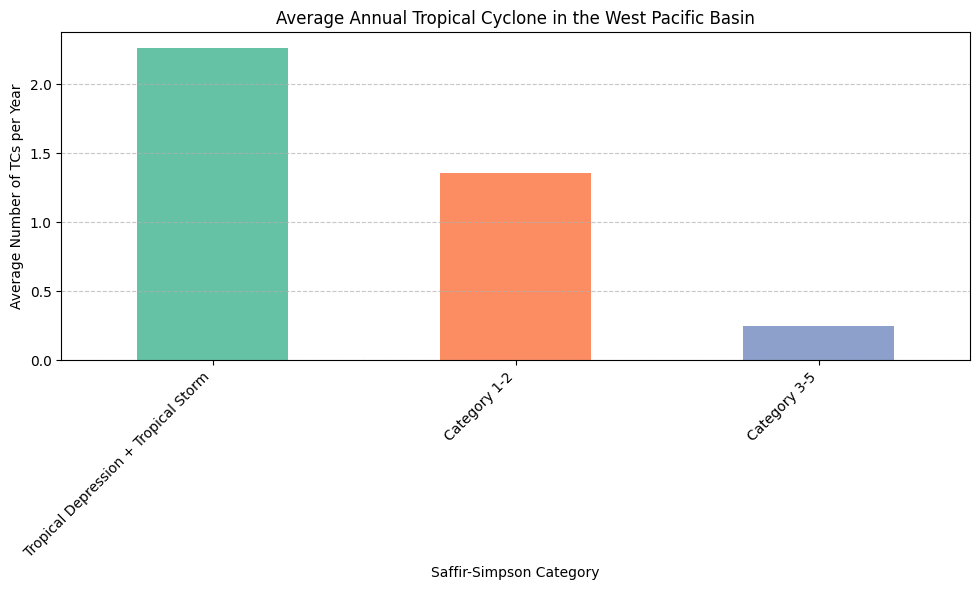

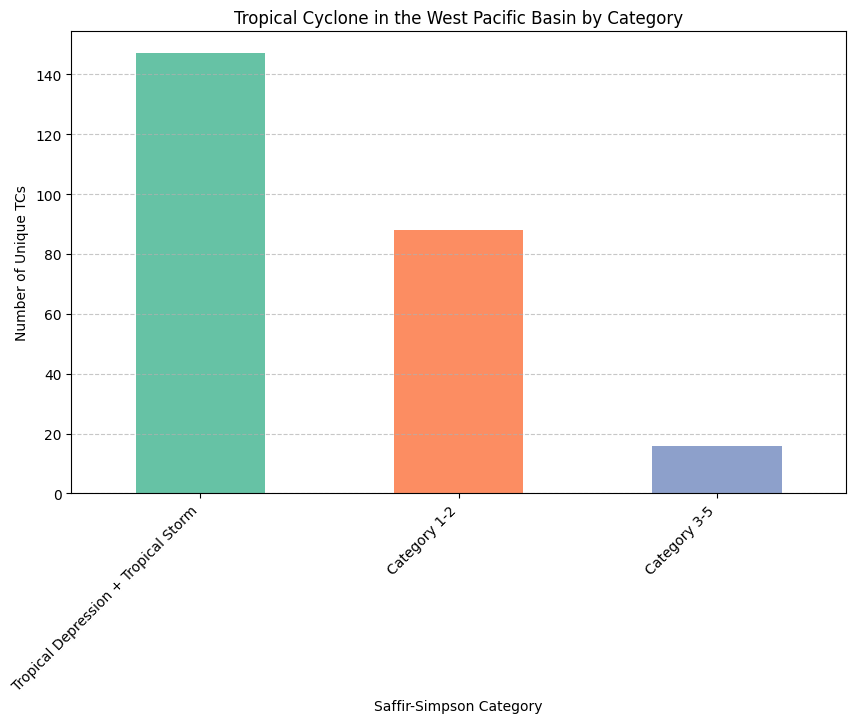

In [65]:
# Function to categorize TCs based on Saffir-Simpson scale (wind speed in m/s)
def categorize_tc(wind_speed):
    if wind_speed <= 32:
        return "Tropical Depression + Tropical Storm"
    elif 33 <= wind_speed <= 49:
        return "Category 1-2"
    else:  # wind_speed >= 50
        return "Category 3-5"

# Apply categorization
tc_tracks['category'] = tc_tracks['Gust_1min'].apply(categorize_tc)

# For each TC, find the maximum wind speed  to assign a single category
tc_max_wind = tc_tracks.groupby('TRACK_ID').agg({
    'Gust_1min': 'max'
}).reset_index()
tc_max_wind['category'] = tc_max_wind['Gust_1min'].apply(categorize_tc)

# Count unique TCs in each category
landfall_counts7 = tc_max_wind['category'].value_counts().reindex([
    "Tropical Depression + Tropical Storm",
    "Category 1-2",
    "Category 3-5"
], fill_value=0)

# Count unique TCs
unique_landfall_tcs = tc_tracks['TRACK_ID'].nunique()

total_years = 2014 - 1950 + 1  # 65 years
avg_tcs_per_year7 = landfall_counts7 / total_years

print("\nAverage number of tropical cyclone in West Pacific Basin per year:")
for category, avg in avg_tcs_per_year7.items():
    print(f"{category}: {avg:.2f}")

print("Number of unique tropical cyclones in the West Pacific Basin by category:")
for category, count in landfall_counts7.items():
    print(f"{category}: {count}")

# Plot bar chart for average TCs per year
plt.figure(figsize=(10, 6))
avg_tcs_per_year7.plot(kind='bar', color=['#66c2a5', '#fc8d62', '#8da0cb'])
plt.title('Average Annual Tropical Cyclone in the West Pacific Basin')
plt.xlabel('Saffir-Simpson Category')
plt.ylabel('Average Number of TCs per Year')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()


# Plot bar chart
plt.figure(figsize=(10, 6))
landfall_counts7.plot(kind='bar', color=['#66c2a5', '#fc8d62', '#8da0cb'])
plt.title('Tropical Cyclone in the West Pacific Basin by Category')
plt.xlabel('Saffir-Simpson Category')
plt.ylabel('Number of Unique TCs')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# **hist-1950**

**round 1**

In [66]:
# Define file paths
tc_shapefile = "ECMWF-IFS-HR_hist-1950_r1i1p1f1_gr_track_nodes_WP.shp"

# Load the shapefiles
tc_tracks = gpd.read_file(tc_shapefile)


Average number of tropical cyclone in West Pacific Basin per year:
Tropical Depression + Tropical Storm: 0.82
Category 1-2: 0.11
Category 3-5: 0.00
Number of unique tropical cyclones in the West Pacific Basin by category:
Tropical Depression + Tropical Storm: 53
Category 1-2: 7
Category 3-5: 0


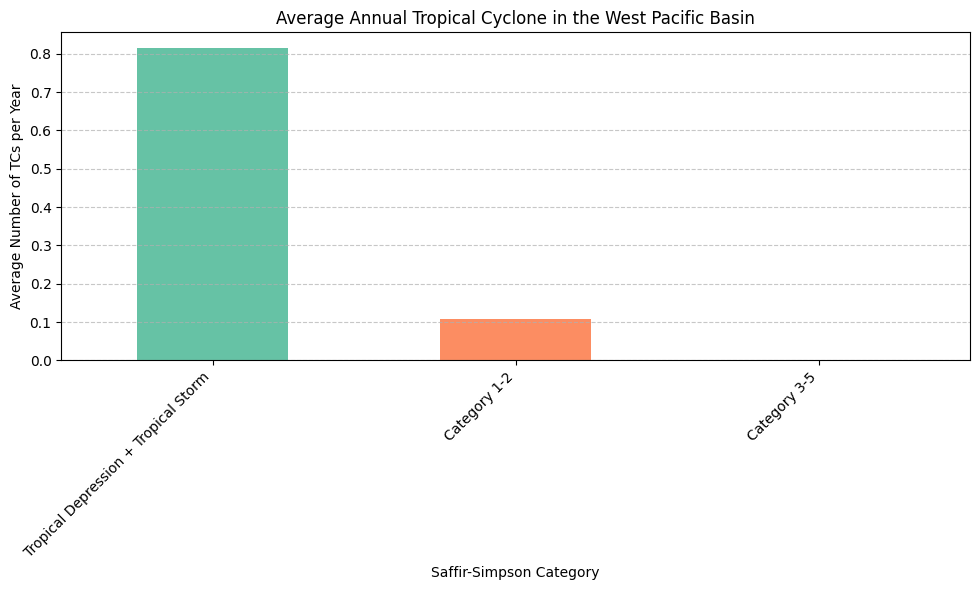

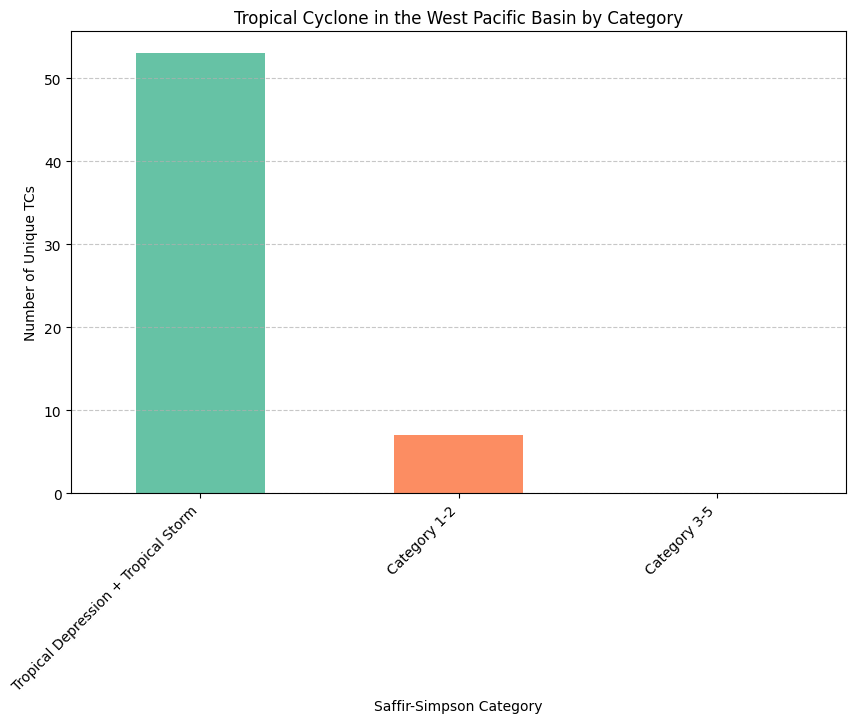

In [67]:
# Function to categorize TCs based on Saffir-Simpson scale (wind speed in m/s)
def categorize_tc(wind_speed):
    if wind_speed <= 32:
        return "Tropical Depression + Tropical Storm"
    elif 33 <= wind_speed <= 49:
        return "Category 1-2"
    else:  # wind_speed >= 50
        return "Category 3-5"

# Apply categorization
tc_tracks['category'] = tc_tracks['Gust_1min'].apply(categorize_tc)

# For each TC, find the maximum wind speed  to assign a single category
tc_max_wind = tc_tracks.groupby('TRACK_ID').agg({
    'Gust_1min': 'max'
}).reset_index()
tc_max_wind['category'] = tc_max_wind['Gust_1min'].apply(categorize_tc)

# Count unique TCs in each category
landfall_counts8 = tc_max_wind['category'].value_counts().reindex([
    "Tropical Depression + Tropical Storm",
    "Category 1-2",
    "Category 3-5"
], fill_value=0)

# Count unique TCs
unique_landfall_tcs = tc_tracks['TRACK_ID'].nunique()

total_years = 2014 - 1950 + 1  # 65 years
avg_tcs_per_year8 = landfall_counts8 / total_years

print("\nAverage number of tropical cyclone in West Pacific Basin per year:")
for category, avg in avg_tcs_per_year8.items():
    print(f"{category}: {avg:.2f}")

print("Number of unique tropical cyclones in the West Pacific Basin by category:")
for category, count in landfall_counts8.items():
    print(f"{category}: {count}")

# Plot bar chart for average TCs per year
plt.figure(figsize=(10, 6))
avg_tcs_per_year8.plot(kind='bar', color=['#66c2a5', '#fc8d62', '#8da0cb'])
plt.title('Average Annual Tropical Cyclone in the West Pacific Basin')
plt.xlabel('Saffir-Simpson Category')
plt.ylabel('Average Number of TCs per Year')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()


# Plot bar chart
plt.figure(figsize=(10, 6))
landfall_counts8.plot(kind='bar', color=['#66c2a5', '#fc8d62', '#8da0cb'])
plt.title('Tropical Cyclone in the West Pacific Basin by Category')
plt.xlabel('Saffir-Simpson Category')
plt.ylabel('Number of Unique TCs')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**round 5**

In [68]:
# Define file paths
tc_shapefile = "ECMWF-IFS-HR_hist-1950_r5i1p1f1_gr_track_nodes_WP.shp"

# Load the shapefiles
tc_tracks = gpd.read_file(tc_shapefile)


Average number of tropical cyclone in West Pacific Basin per year:
Tropical Depression + Tropical Storm: 0.54
Category 1-2: 0.11
Category 3-5: 0.02
Number of unique tropical cyclones in the West Pacific Basin by category:
Tropical Depression + Tropical Storm: 35
Category 1-2: 7
Category 3-5: 1


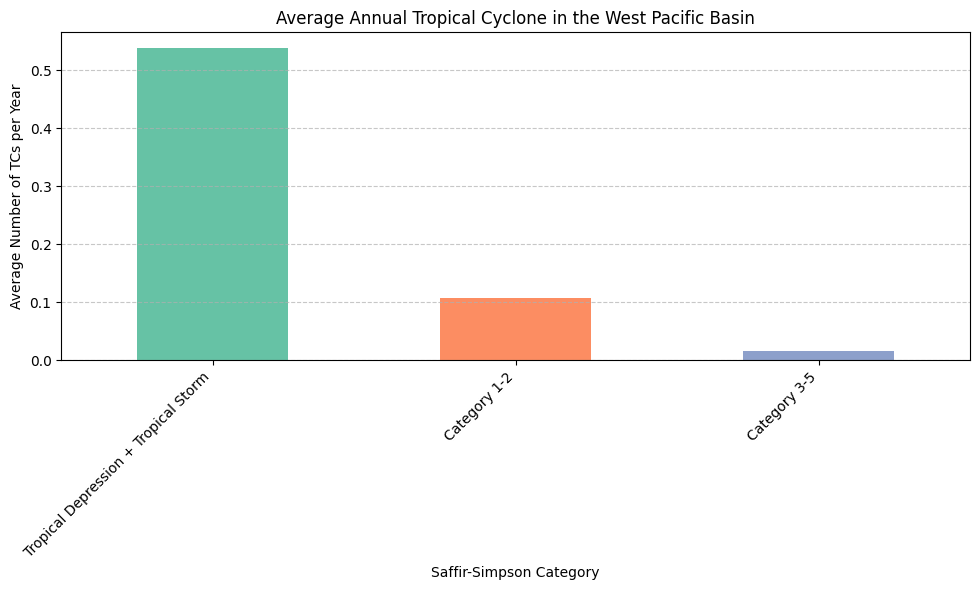

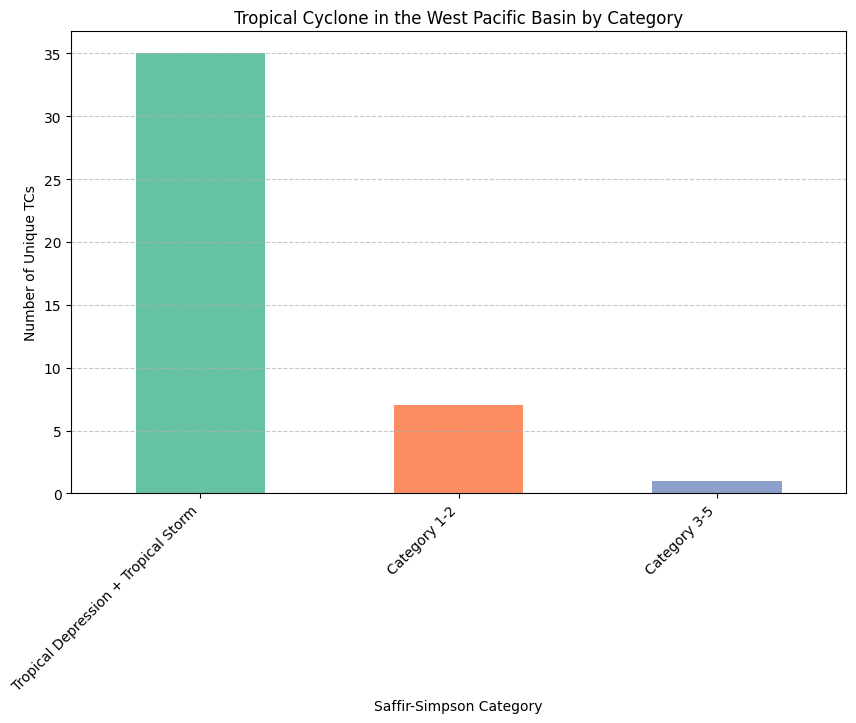

In [69]:
# Function to categorize TCs based on Saffir-Simpson scale (wind speed in m/s)
def categorize_tc(wind_speed):
    if wind_speed <= 32:
        return "Tropical Depression + Tropical Storm"
    elif 33 <= wind_speed <= 49:
        return "Category 1-2"
    else:  # wind_speed >= 50
        return "Category 3-5"

# Apply categorization
tc_tracks['category'] = tc_tracks['Gust_1min'].apply(categorize_tc)

# For each TC, find the maximum wind speed  to assign a single category
tc_max_wind = tc_tracks.groupby('TRACK_ID').agg({
    'Gust_1min': 'max'
}).reset_index()
tc_max_wind['category'] = tc_max_wind['Gust_1min'].apply(categorize_tc)

# Count unique TCs in each category
landfall_counts9 = tc_max_wind['category'].value_counts().reindex([
    "Tropical Depression + Tropical Storm",
    "Category 1-2",
    "Category 3-5"
], fill_value=0)

# Count unique TCs
unique_landfall_tcs = tc_tracks['TRACK_ID'].nunique()

total_years = 2014 - 1950 + 1  # 65 years
avg_tcs_per_year9 = landfall_counts9 / total_years

print("\nAverage number of tropical cyclone in West Pacific Basin per year:")
for category, avg in avg_tcs_per_year9.items():
    print(f"{category}: {avg:.2f}")

print("Number of unique tropical cyclones in the West Pacific Basin by category:")
for category, count in landfall_counts9.items():
    print(f"{category}: {count}")

# Plot bar chart for average TCs per year
plt.figure(figsize=(10, 6))
avg_tcs_per_year9.plot(kind='bar', color=['#66c2a5', '#fc8d62', '#8da0cb'])
plt.title('Average Annual Tropical Cyclone in the West Pacific Basin')
plt.xlabel('Saffir-Simpson Category')
plt.ylabel('Average Number of TCs per Year')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()


# Plot bar chart
plt.figure(figsize=(10, 6))
landfall_counts9.plot(kind='bar', color=['#66c2a5', '#fc8d62', '#8da0cb'])
plt.title('Tropical Cyclone in the West Pacific Basin by Category')
plt.xlabel('Saffir-Simpson Category')
plt.ylabel('Number of Unique TCs')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**Round 6**

In [70]:
# Define file paths
tc_shapefile = "ECMWF-IFS-HR_hist-1950_r6i1p1f1_gr_track_nodes_WP.shp"

# Load the shapefiles
tc_tracks = gpd.read_file(tc_shapefile)


Average number of tropical cyclone in West Pacific Basin per year:
Tropical Depression + Tropical Storm: 0.54
Category 1-2: 0.11
Category 3-5: 0.02
Number of unique tropical cyclones in the West Pacific Basin by category:
Tropical Depression + Tropical Storm: 35
Category 1-2: 7
Category 3-5: 1


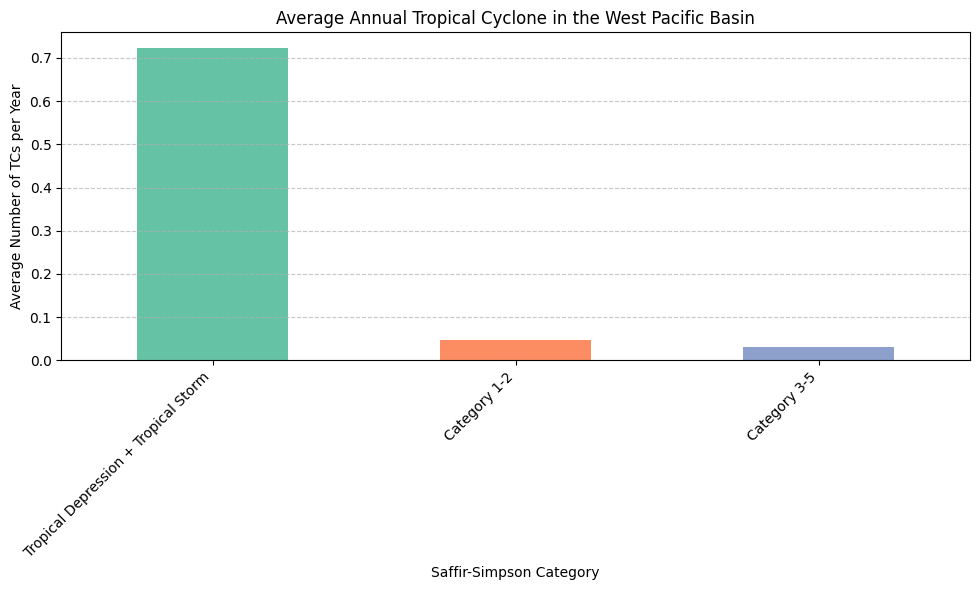

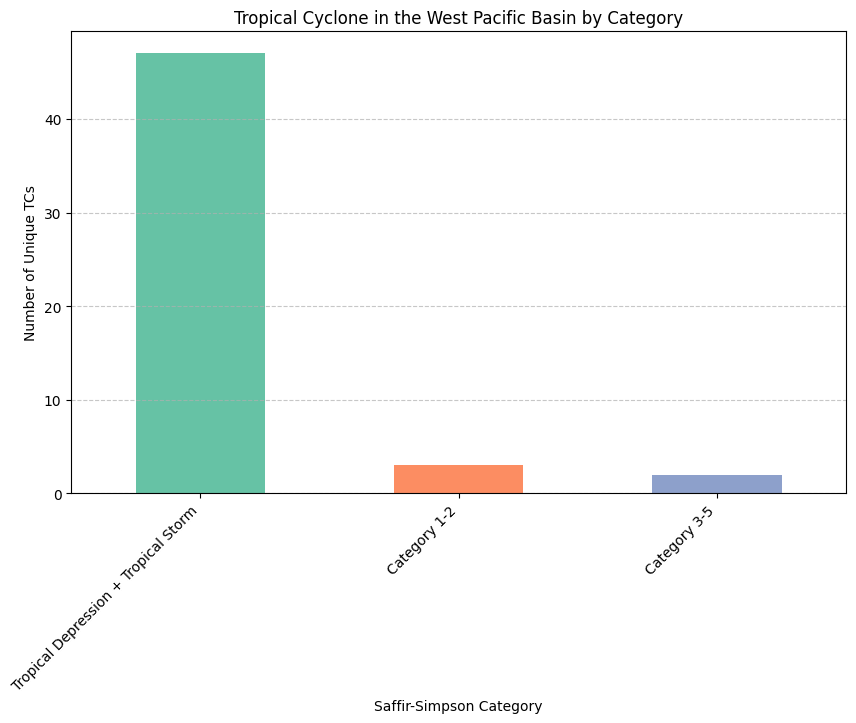

In [71]:
# Function to categorize TCs based on Saffir-Simpson scale (wind speed in m/s)
def categorize_tc(wind_speed):
    if wind_speed <= 32:
        return "Tropical Depression + Tropical Storm"
    elif 33 <= wind_speed <= 49:
        return "Category 1-2"
    else:  # wind_speed >= 50
        return "Category 3-5"

# Apply categorization
tc_tracks['category'] = tc_tracks['Gust_1min'].apply(categorize_tc)

# For each TC, find the maximum wind speed  to assign a single category
tc_max_wind = tc_tracks.groupby('TRACK_ID').agg({
    'Gust_1min': 'max'
}).reset_index()
tc_max_wind['category'] = tc_max_wind['Gust_1min'].apply(categorize_tc)

# Count unique TCs in each category
landfall_counts10 = tc_max_wind['category'].value_counts().reindex([
    "Tropical Depression + Tropical Storm",
    "Category 1-2",
    "Category 3-5"
], fill_value=0)

# Count unique TCs
unique_landfall_tcs = tc_tracks['TRACK_ID'].nunique()

total_years = 2014 - 1950 + 1  # 65 years
avg_tcs_per_year10 = landfall_counts10 / total_years

print("\nAverage number of tropical cyclone in West Pacific Basin per year:")
for category, avg in avg_tcs_per_year9.items():
    print(f"{category}: {avg:.2f}")

print("Number of unique tropical cyclones in the West Pacific Basin by category:")
for category, count in landfall_counts9.items():
    print(f"{category}: {count}")

# Plot bar chart for average TCs per year
plt.figure(figsize=(10, 6))
avg_tcs_per_year10.plot(kind='bar', color=['#66c2a5', '#fc8d62', '#8da0cb'])
plt.title('Average Annual Tropical Cyclone in the West Pacific Basin')
plt.xlabel('Saffir-Simpson Category')
plt.ylabel('Average Number of TCs per Year')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()


# Plot bar chart
plt.figure(figsize=(10, 6))
landfall_counts10.plot(kind='bar', color=['#66c2a5', '#fc8d62', '#8da0cb'])
plt.title('Tropical Cyclone in the West Pacific Basin by Category')
plt.xlabel('Saffir-Simpson Category')
plt.ylabel('Number of Unique TCs')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# **Result of ECMWF-IFS-HR**

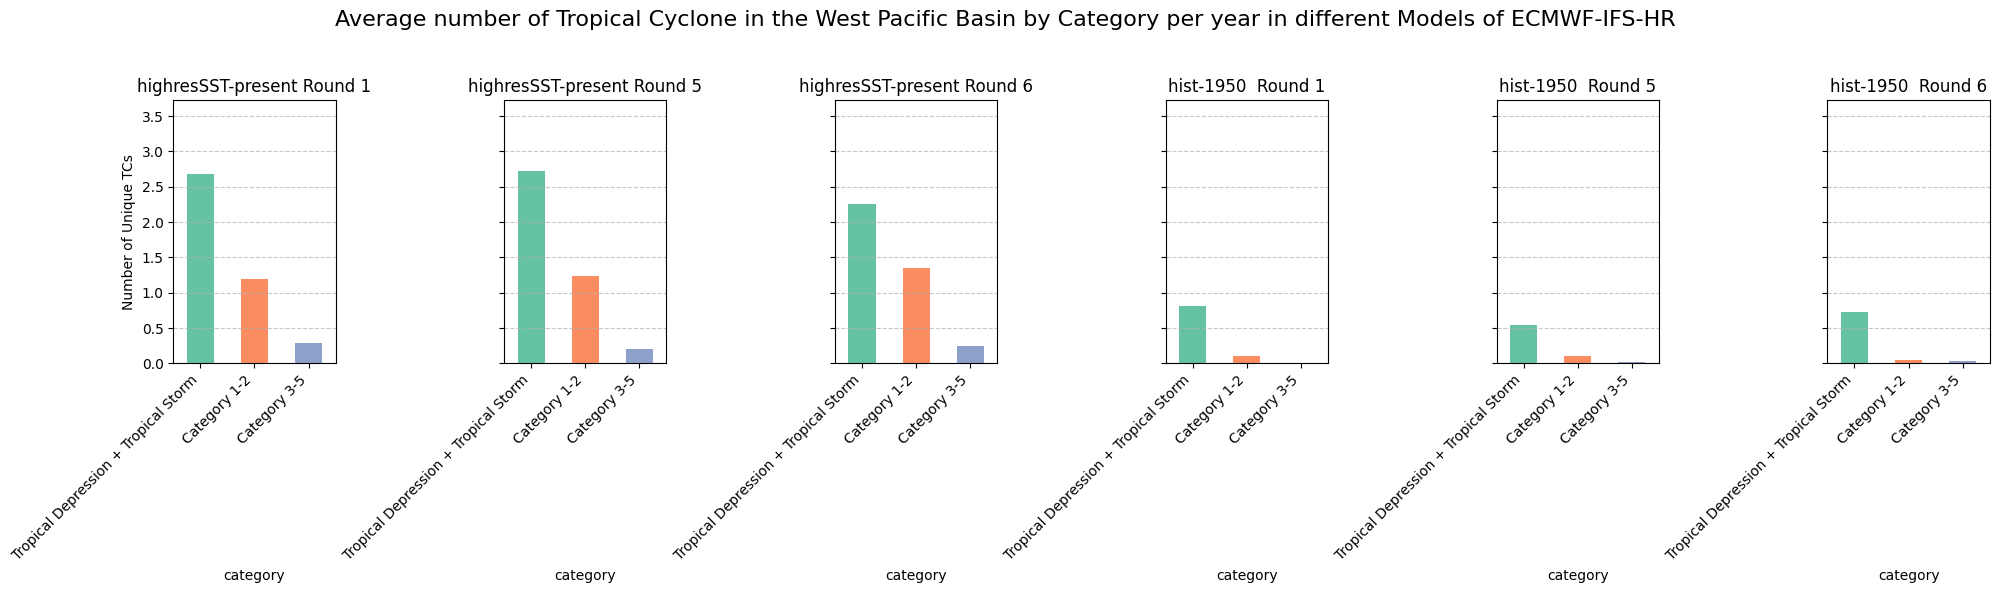

In [72]:
landfall_counts_list = [
    (avg_tcs_per_year5, "highresSST-present Round 1"),
    (avg_tcs_per_year6, "highresSST-present Round 5"),
    (avg_tcs_per_year7, "highresSST-present Round 6"),
    (avg_tcs_per_year8, "hist-1950  Round 1"),
    (avg_tcs_per_year9, "hist-1950  Round 5"),
    (avg_tcs_per_year10, "hist-1950  Round 6")
]

# Create subplots (1 row, 6 columns)
fig, axes = plt.subplots(1, 6, figsize=(20, 6), sharey=True)

# Colors for consistency across subplots
colors = ['#66c2a5', '#fc8d62', '#8da0cb']

# Find the maximum y value for consistent y-axis limits
max_y = max([counts.max() for counts, _ in landfall_counts_list])

# Plot each bar chart
for i, (counts, label) in enumerate(landfall_counts_list):
    counts.plot(kind='bar', ax=axes[i], color=colors)
    axes[i].set_title(label)
    axes[i].set_ylabel('Number of Unique TCs' if i == 0 else '')
    axes[i].set_xticklabels(counts.index, rotation=45, ha='right')
    axes[i].set_ylim(0, max_y + 1)  # Consistent y-axis limits
    axes[i].grid(axis='y', linestyle='--', alpha=0.7)

# Add a super title
plt.suptitle('Average number of Tropical Cyclone in the West Pacific Basin by Category per year in different Models of ECMWF-IFS-HR', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust for suptitle
plt.show()

# **2.1.4 EC-EARTH3P-HR**

# **highresSST-present**

**Round 1**

In [73]:
# Define file paths
tc_shapefile = "EC-Earth3P-HR_highresSST-present_r1i1p1f1_gr_track_nodes_WP.shp"

# Load the shapefiles
tc_tracks = gpd.read_file(tc_shapefile)


Average number of tropical cyclone in West Pacific Basin per year:
Tropical Depression + Tropical Storm: 0.82
Category 1-2: 0.34
Category 3-5: 0.11
Number of unique tropical cyclones in the West Pacific Basin by category:
Tropical Depression + Tropical Storm: 53
Category 1-2: 22
Category 3-5: 7


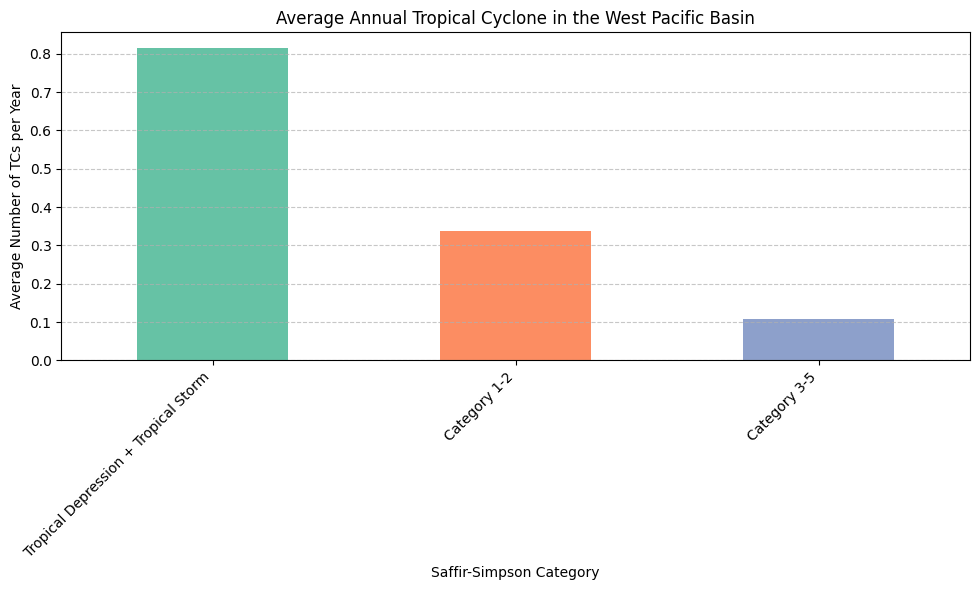

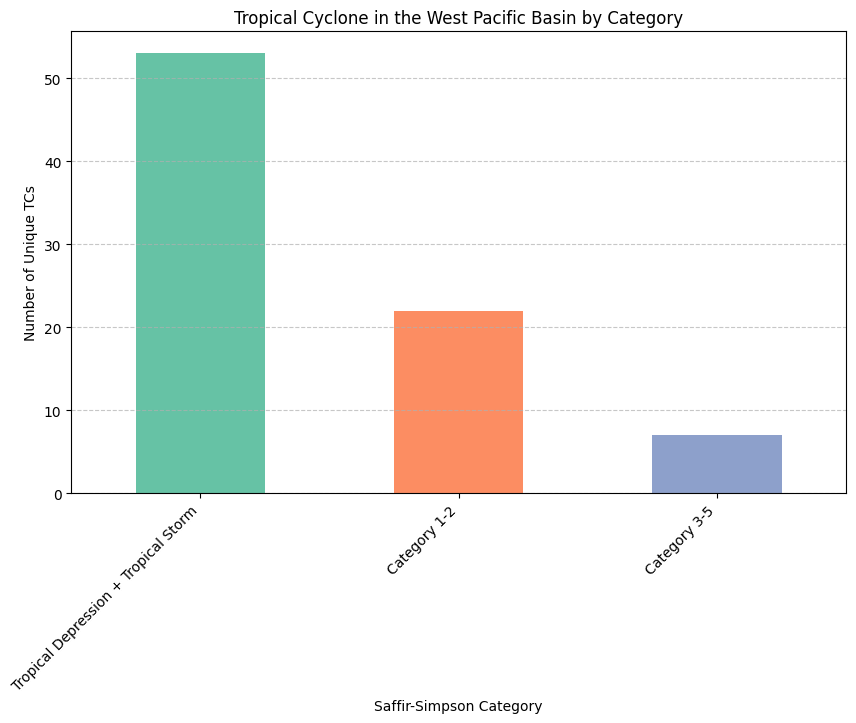

In [74]:
# Function to categorize TCs based on Saffir-Simpson scale (wind speed in m/s)
def categorize_tc(wind_speed):
    if wind_speed <= 32:
        return "Tropical Depression + Tropical Storm"
    elif 33 <= wind_speed <= 49:
        return "Category 1-2"
    else:  # wind_speed >= 50
        return "Category 3-5"

# Apply categorization
tc_tracks['category'] = tc_tracks['Gust_1min'].apply(categorize_tc)

# For each TC, find the maximum wind speed  to assign a single category
tc_max_wind = tc_tracks.groupby('TRACK_ID').agg({
    'Gust_1min': 'max'
}).reset_index()
tc_max_wind['category'] = tc_max_wind['Gust_1min'].apply(categorize_tc)

# Count unique TCs in each category
landfall_counts11 = tc_max_wind['category'].value_counts().reindex([
    "Tropical Depression + Tropical Storm",
    "Category 1-2",
    "Category 3-5"
], fill_value=0)

# Count unique TCs
unique_landfall_tcs = tc_tracks['TRACK_ID'].nunique()

total_years = 2014 - 1950 + 1  # 65 years
avg_tcs_per_year11 = landfall_counts11 / total_years

print("\nAverage number of tropical cyclone in West Pacific Basin per year:")
for category, avg in avg_tcs_per_year11.items():
    print(f"{category}: {avg:.2f}")

print("Number of unique tropical cyclones in the West Pacific Basin by category:")
for category, count in landfall_counts11.items():
    print(f"{category}: {count}")

# Plot bar chart for average TCs per year
plt.figure(figsize=(10, 6))
avg_tcs_per_year11.plot(kind='bar', color=['#66c2a5', '#fc8d62', '#8da0cb'])
plt.title('Average Annual Tropical Cyclone in the West Pacific Basin')
plt.xlabel('Saffir-Simpson Category')
plt.ylabel('Average Number of TCs per Year')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()


# Plot bar chart
plt.figure(figsize=(10, 6))
landfall_counts11.plot(kind='bar', color=['#66c2a5', '#fc8d62', '#8da0cb'])
plt.title('Tropical Cyclone in the West Pacific Basin by Category')
plt.xlabel('Saffir-Simpson Category')
plt.ylabel('Number of Unique TCs')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


**Round 2**

In [75]:
# Define file paths
tc_shapefile = "EC-Earth3P-HR_highresSST-present_r2i1p1f1_gr_track_nodes_WP.shp"

# Load the shapefiles
tc_tracks = gpd.read_file(tc_shapefile)


Average number of tropical cyclone in West Pacific Basin per year:
Tropical Depression + Tropical Storm: 0.91
Category 1-2: 0.40
Category 3-5: 0.06
Number of unique tropical cyclones in the West Pacific Basin by category:
Tropical Depression + Tropical Storm: 59
Category 1-2: 26
Category 3-5: 4


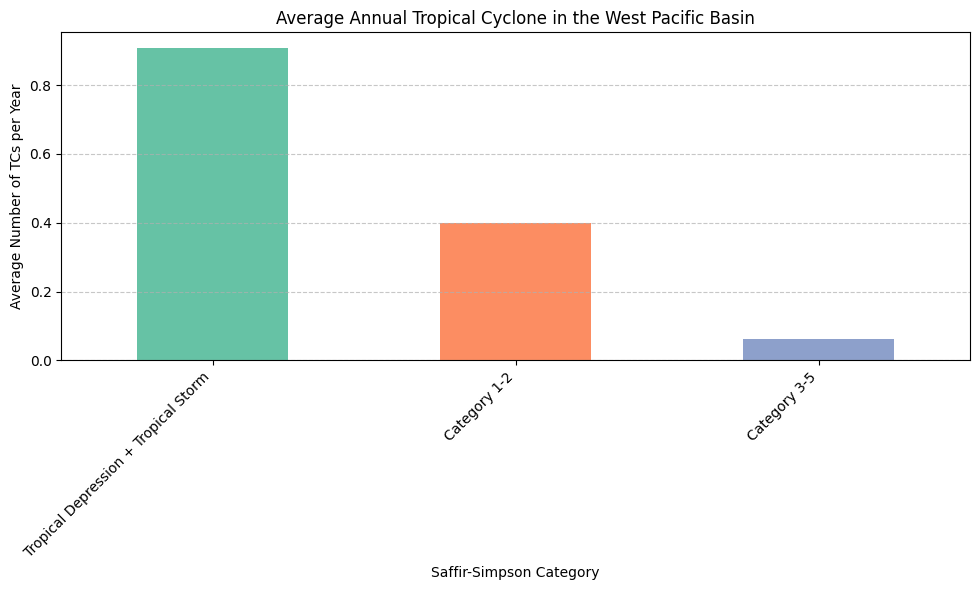

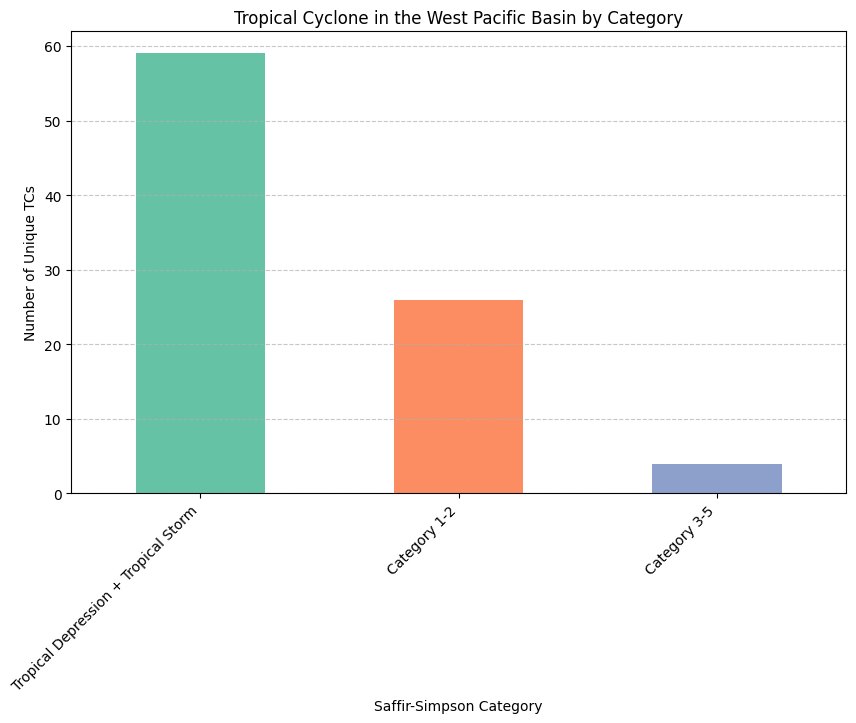

In [76]:
# Function to categorize TCs based on Saffir-Simpson scale (wind speed in m/s)
def categorize_tc(wind_speed):
    if wind_speed <= 32:
        return "Tropical Depression + Tropical Storm"
    elif 33 <= wind_speed <= 49:
        return "Category 1-2"
    else:  # wind_speed >= 50
        return "Category 3-5"

# Apply categorization
tc_tracks['category'] = tc_tracks['Gust_1min'].apply(categorize_tc)

# For each TC, find the maximum wind speed  to assign a single category
tc_max_wind = tc_tracks.groupby('TRACK_ID').agg({
    'Gust_1min': 'max'
}).reset_index()
tc_max_wind['category'] = tc_max_wind['Gust_1min'].apply(categorize_tc)

# Count unique TCs in each category
landfall_counts12 = tc_max_wind['category'].value_counts().reindex([
    "Tropical Depression + Tropical Storm",
    "Category 1-2",
    "Category 3-5"
], fill_value=0)

# Count unique TCs
unique_landfall_tcs = tc_tracks['TRACK_ID'].nunique()

total_years = 2014 - 1950 + 1  # 65 years
avg_tcs_per_year12 = landfall_counts12 / total_years

print("\nAverage number of tropical cyclone in West Pacific Basin per year:")
for category, avg in avg_tcs_per_year12.items():
    print(f"{category}: {avg:.2f}")

print("Number of unique tropical cyclones in the West Pacific Basin by category:")
for category, count in landfall_counts12.items():
    print(f"{category}: {count}")

# Plot bar chart for average TCs per year
plt.figure(figsize=(10, 6))
avg_tcs_per_year12.plot(kind='bar', color=['#66c2a5', '#fc8d62', '#8da0cb'])
plt.title('Average Annual Tropical Cyclone in the West Pacific Basin')
plt.xlabel('Saffir-Simpson Category')
plt.ylabel('Average Number of TCs per Year')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()


# Plot bar chart
plt.figure(figsize=(10, 6))
landfall_counts12.plot(kind='bar', color=['#66c2a5', '#fc8d62', '#8da0cb'])
plt.title('Tropical Cyclone in the West Pacific Basin by Category')
plt.xlabel('Saffir-Simpson Category')
plt.ylabel('Number of Unique TCs')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**Round 3**

In [77]:
# Define file paths
tc_shapefile = "EC-Earth3P-HR_highresSST-present_r3i1p1f1_gr_track_nodes_WP.shp"

# Load the shapefiles
tc_tracks = gpd.read_file(tc_shapefile)


Average number of tropical cyclone in West Pacific Basin per year:
Tropical Depression + Tropical Storm: 0.72
Category 1-2: 0.42
Category 3-5: 0.09
Number of unique tropical cyclones in the West Pacific Basin by category:
Tropical Depression + Tropical Storm: 47
Category 1-2: 27
Category 3-5: 6


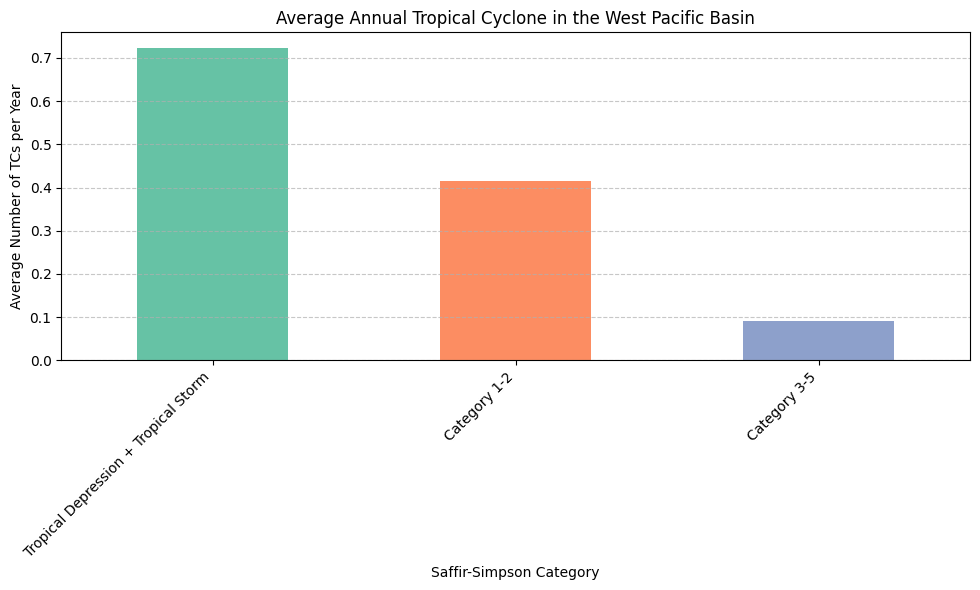

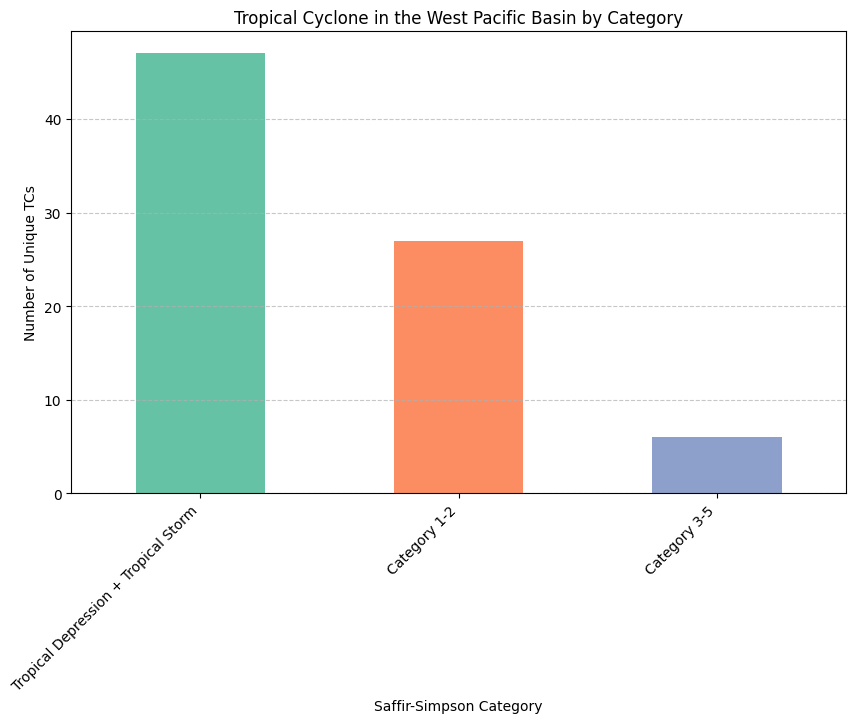

In [78]:
# Function to categorize TCs based on Saffir-Simpson scale (wind speed in m/s)
def categorize_tc(wind_speed):
    if wind_speed <= 32:
        return "Tropical Depression + Tropical Storm"
    elif 33 <= wind_speed <= 49:
        return "Category 1-2"
    else:  # wind_speed >= 50
        return "Category 3-5"

# Apply categorization
tc_tracks['category'] = tc_tracks['Gust_1min'].apply(categorize_tc)

# For each TC, find the maximum wind speed  to assign a single category
tc_max_wind = tc_tracks.groupby('TRACK_ID').agg({
    'Gust_1min': 'max'
}).reset_index()
tc_max_wind['category'] = tc_max_wind['Gust_1min'].apply(categorize_tc)

# Count unique TCs in each category
landfall_counts13 = tc_max_wind['category'].value_counts().reindex([
    "Tropical Depression + Tropical Storm",
    "Category 1-2",
    "Category 3-5"
], fill_value=0)

# Count unique TCs
unique_landfall_tcs = tc_tracks['TRACK_ID'].nunique()

total_years = 2014 - 1950 + 1  # 65 years
avg_tcs_per_year13 = landfall_counts13 / total_years

print("\nAverage number of tropical cyclone in West Pacific Basin per year:")
for category, avg in avg_tcs_per_year13.items():
    print(f"{category}: {avg:.2f}")

print("Number of unique tropical cyclones in the West Pacific Basin by category:")
for category, count in landfall_counts13.items():
    print(f"{category}: {count}")

# Plot bar chart for average TCs per year
plt.figure(figsize=(10, 6))
avg_tcs_per_year13.plot(kind='bar', color=['#66c2a5', '#fc8d62', '#8da0cb'])
plt.title('Average Annual Tropical Cyclone in the West Pacific Basin')
plt.xlabel('Saffir-Simpson Category')
plt.ylabel('Average Number of TCs per Year')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()


# Plot bar chart
plt.figure(figsize=(10, 6))
landfall_counts13.plot(kind='bar', color=['#66c2a5', '#fc8d62', '#8da0cb'])
plt.title('Tropical Cyclone in the West Pacific Basin by Category')
plt.xlabel('Saffir-Simpson Category')
plt.ylabel('Number of Unique TCs')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# **hist-1950**

**round 1**

In [79]:
# Define file paths
tc_shapefile = "EC-Earth3P-HR_hist-1950_r1i1p2f1_gr_track_nodes_WP.shp"

# Load the shapefiles
tc_tracks = gpd.read_file(tc_shapefile)


Average number of tropical cyclone in West Pacific Basin per year:
Tropical Depression + Tropical Storm: 0.92
Category 1-2: 0.32
Category 3-5: 0.05
Number of unique tropical cyclones in the West Pacific Basin by category:
Tropical Depression + Tropical Storm: 60
Category 1-2: 21
Category 3-5: 3


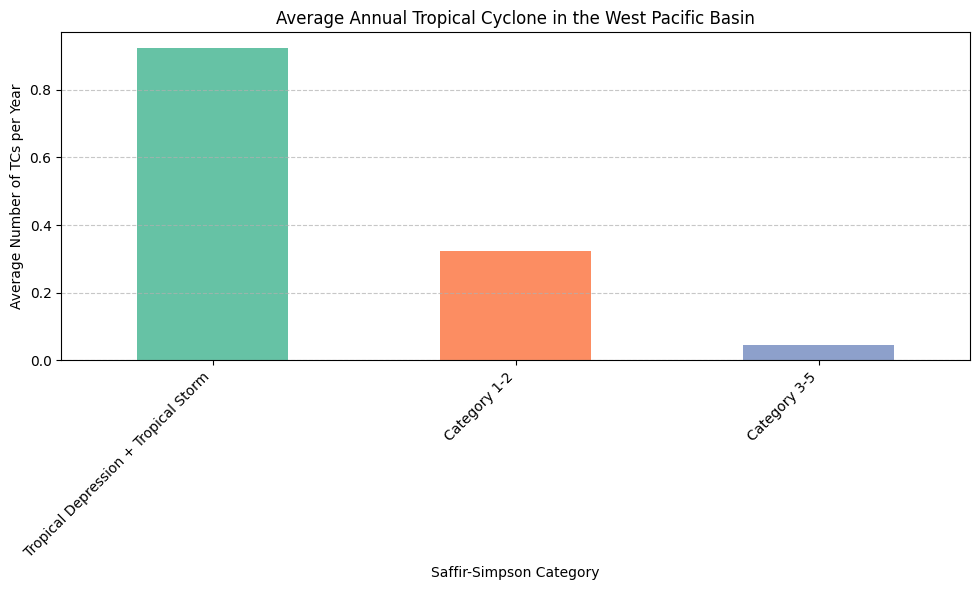

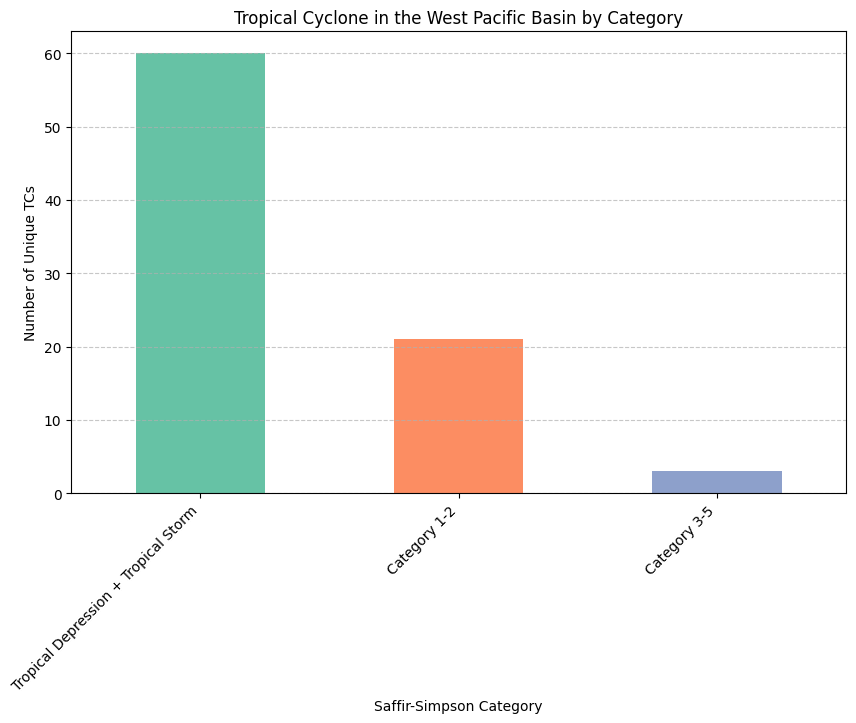

In [80]:
# Function to categorize TCs based on Saffir-Simpson scale (wind speed in m/s)
def categorize_tc(wind_speed):
    if wind_speed <= 32:
        return "Tropical Depression + Tropical Storm"
    elif 33 <= wind_speed <= 49:
        return "Category 1-2"
    else:  # wind_speed >= 50
        return "Category 3-5"

# Apply categorization
tc_tracks['category'] = tc_tracks['Gust_1min'].apply(categorize_tc)

# For each TC, find the maximum wind speed  to assign a single category
tc_max_wind = tc_tracks.groupby('TRACK_ID').agg({
    'Gust_1min': 'max'
}).reset_index()
tc_max_wind['category'] = tc_max_wind['Gust_1min'].apply(categorize_tc)

# Count unique TCs in each category
landfall_counts14 = tc_max_wind['category'].value_counts().reindex([
    "Tropical Depression + Tropical Storm",
    "Category 1-2",
    "Category 3-5"
], fill_value=0)

# Count unique TCs
unique_landfall_tcs = tc_tracks['TRACK_ID'].nunique()

total_years = 2014 - 1950 + 1  # 65 years
avg_tcs_per_year14 = landfall_counts14 / total_years

print("\nAverage number of tropical cyclone in West Pacific Basin per year:")
for category, avg in avg_tcs_per_year14.items():
    print(f"{category}: {avg:.2f}")

print("Number of unique tropical cyclones in the West Pacific Basin by category:")
for category, count in landfall_counts14.items():
    print(f"{category}: {count}")

# Plot bar chart for average TCs per year
plt.figure(figsize=(10, 6))
avg_tcs_per_year14.plot(kind='bar', color=['#66c2a5', '#fc8d62', '#8da0cb'])
plt.title('Average Annual Tropical Cyclone in the West Pacific Basin')
plt.xlabel('Saffir-Simpson Category')
plt.ylabel('Average Number of TCs per Year')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()


# Plot bar chart
plt.figure(figsize=(10, 6))
landfall_counts14.plot(kind='bar', color=['#66c2a5', '#fc8d62', '#8da0cb'])
plt.title('Tropical Cyclone in the West Pacific Basin by Category')
plt.xlabel('Saffir-Simpson Category')
plt.ylabel('Number of Unique TCs')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**round 2**

In [81]:
# Define file paths
tc_shapefile = "EC-Earth3P-HR_hist-1950_r2i1p2f1_gr_track_nodes_WP.shp"

# Load the shapefiles
tc_tracks = gpd.read_file(tc_shapefile)


Average number of tropical cyclone in West Pacific Basin per year:
Tropical Depression + Tropical Storm: 0.82
Category 1-2: 0.37
Category 3-5: 0.11
Number of unique tropical cyclones in the West Pacific Basin by category:
Tropical Depression + Tropical Storm: 53
Category 1-2: 24
Category 3-5: 7


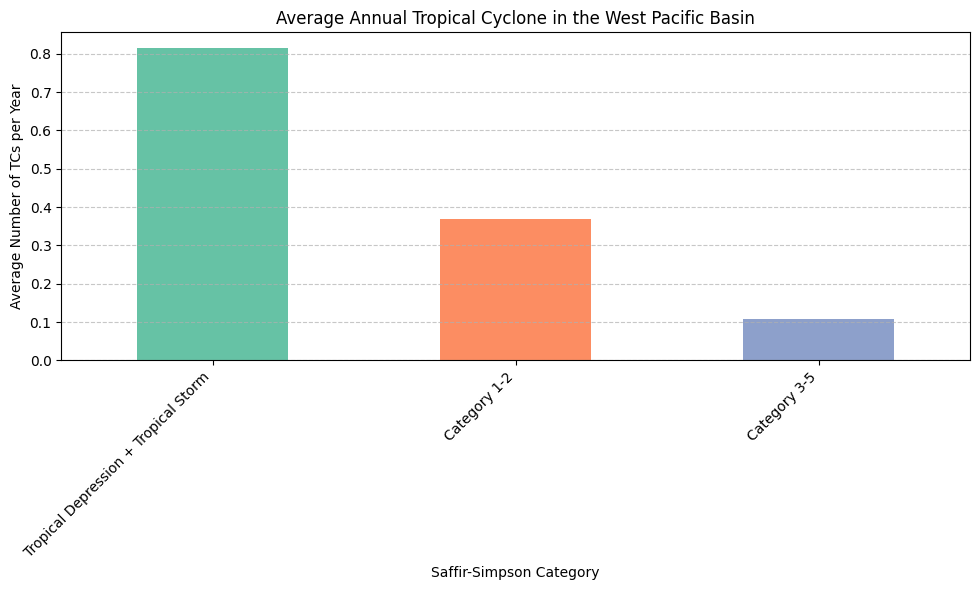

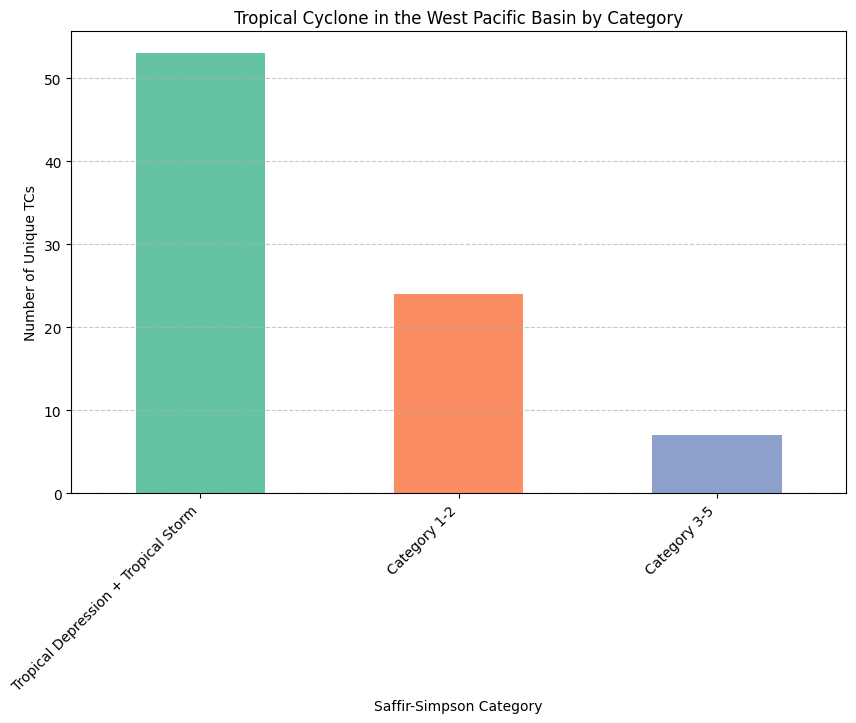

In [82]:
# Function to categorize TCs based on Saffir-Simpson scale (wind speed in m/s)
def categorize_tc(wind_speed):
    if wind_speed <= 32:
        return "Tropical Depression + Tropical Storm"
    elif 33 <= wind_speed <= 49:
        return "Category 1-2"
    else:  # wind_speed >= 50
        return "Category 3-5"

# Apply categorization
tc_tracks['category'] = tc_tracks['Gust_1min'].apply(categorize_tc)

# For each TC, find the maximum wind speed  to assign a single category
tc_max_wind = tc_tracks.groupby('TRACK_ID').agg({
    'Gust_1min': 'max'
}).reset_index()
tc_max_wind['category'] = tc_max_wind['Gust_1min'].apply(categorize_tc)

# Count unique TCs in each category
landfall_counts15 = tc_max_wind['category'].value_counts().reindex([
    "Tropical Depression + Tropical Storm",
    "Category 1-2",
    "Category 3-5"
], fill_value=0)

# Count unique TCs
unique_landfall_tcs = tc_tracks['TRACK_ID'].nunique()

total_years = 2014 - 1950 + 1  # 65 years
avg_tcs_per_year15 = landfall_counts15 / total_years

print("\nAverage number of tropical cyclone in West Pacific Basin per year:")
for category, avg in avg_tcs_per_year15.items():
    print(f"{category}: {avg:.2f}")

print("Number of unique tropical cyclones in the West Pacific Basin by category:")
for category, count in landfall_counts15.items():
    print(f"{category}: {count}")

# Plot bar chart for average TCs per year
plt.figure(figsize=(10, 6))
avg_tcs_per_year15.plot(kind='bar', color=['#66c2a5', '#fc8d62', '#8da0cb'])
plt.title('Average Annual Tropical Cyclone in the West Pacific Basin')
plt.xlabel('Saffir-Simpson Category')
plt.ylabel('Average Number of TCs per Year')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()


# Plot bar chart
plt.figure(figsize=(10, 6))
landfall_counts15.plot(kind='bar', color=['#66c2a5', '#fc8d62', '#8da0cb'])
plt.title('Tropical Cyclone in the West Pacific Basin by Category')
plt.xlabel('Saffir-Simpson Category')
plt.ylabel('Number of Unique TCs')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# **Result of EC-EARTH3P-HR**

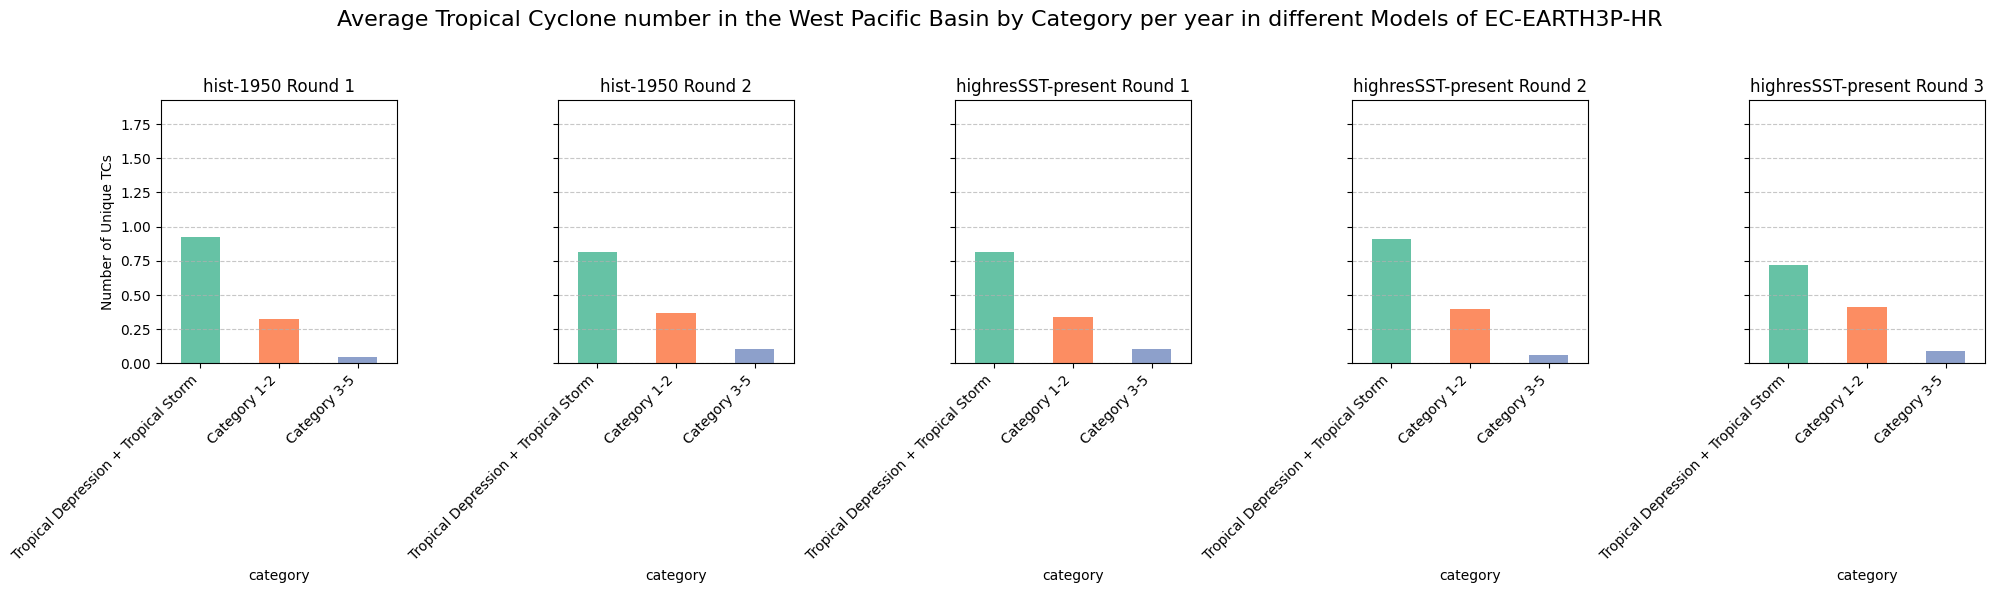

In [83]:
avg_landfall_counts_list = [
    (avg_tcs_per_year14, "hist-1950 Round 1"),
    (avg_tcs_per_year15, "hist-1950 Round 2"),
    (avg_tcs_per_year11, "highresSST-present Round 1"),
    (avg_tcs_per_year12, "highresSST-present Round 2"),
    (avg_tcs_per_year13, "highresSST-present Round 3")
]

# Create subplots (1 row, 5 columns)
fig, axes = plt.subplots(1, 5, figsize=(20, 6), sharey=True)

# Colors for consistency across subplots
colors = ['#66c2a5', '#fc8d62', '#8da0cb']

# Find the maximum y value for consistent y-axis limits
max_y = max([counts.max() for counts, _ in avg_landfall_counts_list])

# Plot each bar chart
for i, (counts, label) in enumerate(avg_landfall_counts_list):
    counts.plot(kind='bar', ax=axes[i], color=colors)
    axes[i].set_title(label)
    axes[i].set_ylabel('Number of Unique TCs' if i == 0 else '')
    axes[i].set_xticklabels(counts.index, rotation=45, ha='right')
    axes[i].set_ylim(0, max_y + 1)  # Consistent y-axis limits
    axes[i].grid(axis='y', linestyle='--', alpha=0.7)

# Add a super title
plt.suptitle('Average Tropical Cyclone number in the West Pacific Basin by Category per year in different Models of EC-EARTH3P-HR', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust for suptitle
plt.show()

In [84]:
# Save data to CSV
data = []
categories = [
    "Tropical Depression + Tropical Storm",
    "Category 1-2",
    "Category 3-5"
]

for dataset, counts, avg in [
    ("hist-1950 Round 1", landfall_counts14, avg_tcs_per_year14),
    ("hist-1950 Round 2", landfall_counts15, avg_tcs_per_year15),
    ("highresSST-present Round 1", landfall_counts11, avg_tcs_per_year11),
    ("highresSST-present Round 2", landfall_counts12, avg_tcs_per_year12),
    ("highresSST-present Round 3", landfall_counts13, avg_tcs_per_year13)

]:
    for category in categories:
        data.append({
            'Dataset': dataset,
            'Category': category,
            'Total_Count': counts.get(category, 0),
            'Average_Per_Year': avg.get(category, 0)
        })
df = pd.DataFrame(data)
df.to_csv('Result of EC-EARTH3P-HR.csv', index=False)
print("\nData saved to 'Result of EC-EARTH3P-HR.csv' ")


Data saved to 'Result of EC-EARTH3P-HR.csv' 


# **2.1.5 CNRM-CM6-1-HR**

# **highresSST-present**

In [85]:
# Define file paths
tc_shapefile = "CNRM-CM6-1-HR_highresSST-present_r1i1p1f2_gr_track_nodes_WP.shp"

# Load the shapefiles
tc_tracks = gpd.read_file(tc_shapefile)


Average number of tropical cyclone in West Pacific Basin per year:
Tropical Depression + Tropical Storm: 2.58
Category 1-2: 2.29
Category 3-5: 1.72
Number of unique tropical cyclones in the West Pacific Basin by category:
Tropical Depression + Tropical Storm: 168
Category 1-2: 149
Category 3-5: 112


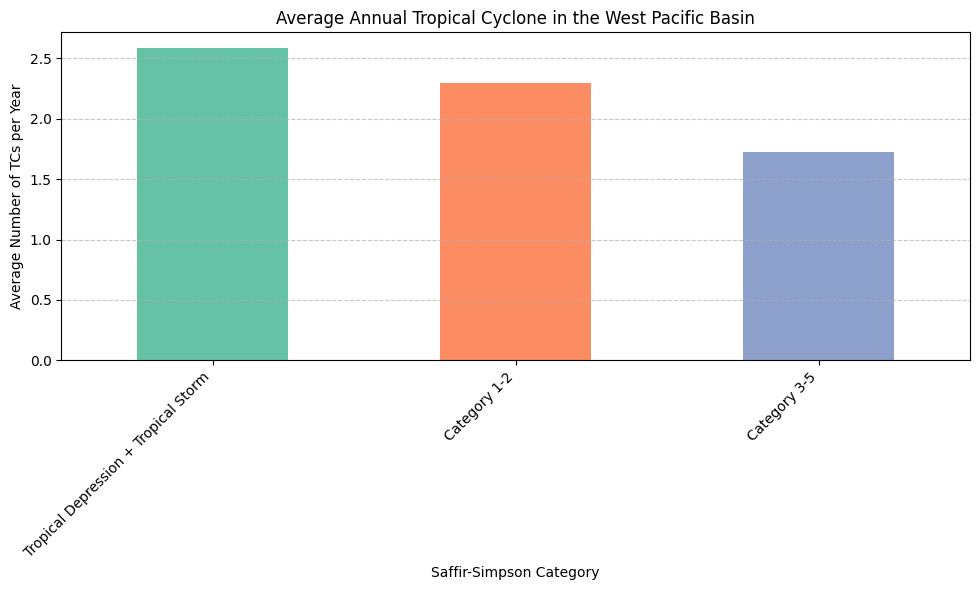

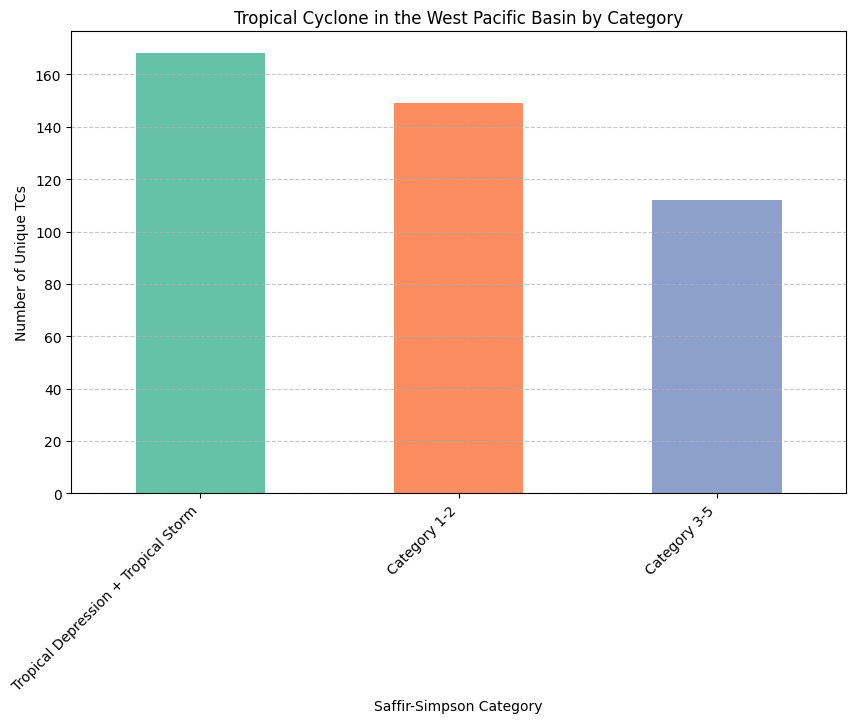

In [86]:
# Function to categorize TCs based on Saffir-Simpson scale (wind speed in m/s)
def categorize_tc(wind_speed):
    if wind_speed <= 32:
        return "Tropical Depression + Tropical Storm"
    elif 33 <= wind_speed <= 49:
        return "Category 1-2"
    else:  # wind_speed >= 50
        return "Category 3-5"

# Apply categorization to landfall nodes
tc_tracks['category'] = tc_tracks['Gust_1min'].apply(categorize_tc)

# For each TC, find the maximum wind speed at landfall to assign a single category
tc_max_wind = tc_tracks.groupby('TRACK_ID').agg({
    'Gust_1min': 'max'
}).reset_index()
tc_max_wind['category'] = tc_max_wind['Gust_1min'].apply(categorize_tc)

# Count unique TCs in each category
landfall_counts16 = tc_max_wind['category'].value_counts().reindex([
    "Tropical Depression + Tropical Storm",
    "Category 1-2",
    "Category 3-5"
], fill_value=0)

# Count unique TCs that make landfall
unique_landfall_tcs = tc_tracks['TRACK_ID'].nunique()

total_years = 2014 - 1950 + 1  # 65 years
avg_tcs_per_year16 = landfall_counts16 / total_years

print("\nAverage number of tropical cyclone in West Pacific Basin per year:")
for category, avg in avg_tcs_per_year16.items():
    print(f"{category}: {avg:.2f}")

print("Number of unique tropical cyclones in the West Pacific Basin by category:")
for category, count in landfall_counts16.items():
    print(f"{category}: {count}")

# Plot bar chart for average TCs per year
plt.figure(figsize=(10, 6))
avg_tcs_per_year16.plot(kind='bar', color=['#66c2a5', '#fc8d62', '#8da0cb'])
plt.title('Average Annual Tropical Cyclone in the West Pacific Basin')
plt.xlabel('Saffir-Simpson Category')
plt.ylabel('Average Number of TCs per Year')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()


# Plot bar chart
plt.figure(figsize=(10, 6))
landfall_counts16.plot(kind='bar', color=['#66c2a5', '#fc8d62', '#8da0cb'])
plt.title('Tropical Cyclone in the West Pacific Basin by Category')
plt.xlabel('Saffir-Simpson Category')
plt.ylabel('Number of Unique TCs')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


# **hist-1950**

In [87]:
# Define file paths
tc_shapefile = "CNRM-CM6-1-HR_hist-1950_r1i1p1f2_gr_track_nodes_WP.shp"

# Load the shapefiles
tc_tracks = gpd.read_file(tc_shapefile)


Average number of tropical cyclone in West Pacific Basin per year:
Tropical Depression + Tropical Storm: 4.15
Category 1-2: 4.28
Category 3-5: 1.72
Number of unique tropical cyclones in the West Pacific Basin by category:
Tropical Depression + Tropical Storm: 270
Category 1-2: 278
Category 3-5: 112


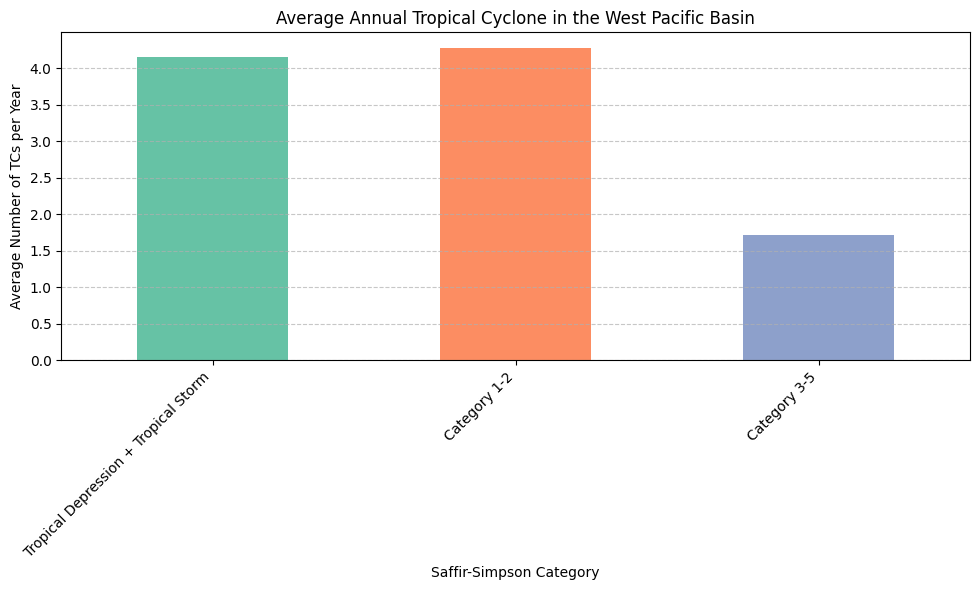

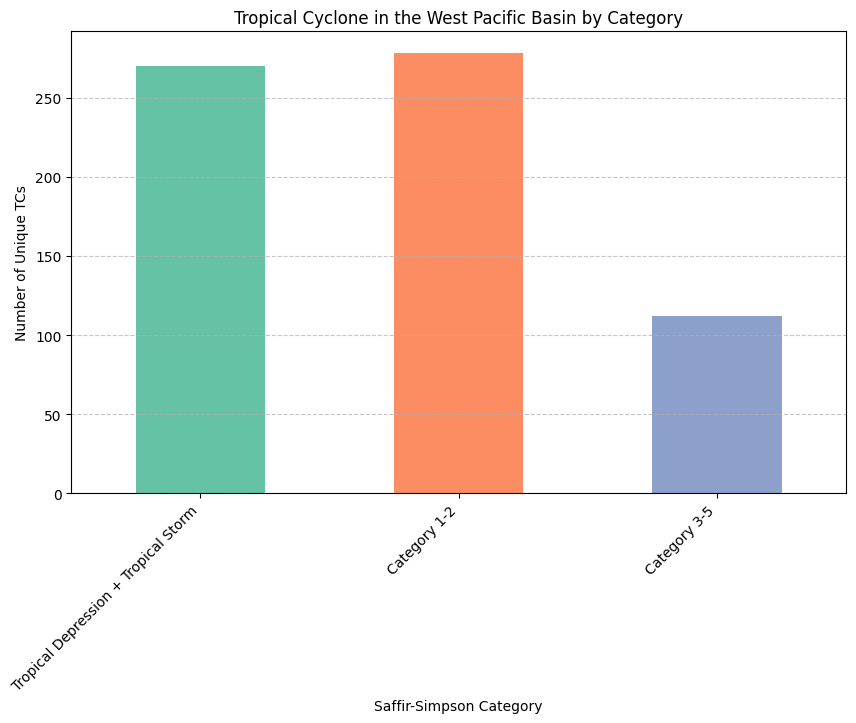

In [88]:
# Function to categorize TCs based on Saffir-Simpson scale (wind speed in m/s)
def categorize_tc(wind_speed):
    if wind_speed <= 32:
        return "Tropical Depression + Tropical Storm"
    elif 33 <= wind_speed <= 49:
        return "Category 1-2"
    else:  # wind_speed >= 50
        return "Category 3-5"

# Apply categorization
tc_tracks['category'] = tc_tracks['Gust_1min'].apply(categorize_tc)

# For each TC, find the maximum wind speed  to assign a single category
tc_max_wind = tc_tracks.groupby('TRACK_ID').agg({
    'Gust_1min': 'max'
}).reset_index()
tc_max_wind['category'] = tc_max_wind['Gust_1min'].apply(categorize_tc)

# Count unique TCs in each category
landfall_counts17 = tc_max_wind['category'].value_counts().reindex([
    "Tropical Depression + Tropical Storm",
    "Category 1-2",
    "Category 3-5"
], fill_value=0)

# Count unique TCs
unique_landfall_tcs = tc_tracks['TRACK_ID'].nunique()

total_years = 2014 - 1950 + 1  # 65 years
avg_tcs_per_year17 = landfall_counts17 / total_years

print("\nAverage number of tropical cyclone in West Pacific Basin per year:")
for category, avg in avg_tcs_per_year17.items():
    print(f"{category}: {avg:.2f}")

print("Number of unique tropical cyclones in the West Pacific Basin by category:")
for category, count in landfall_counts17.items():
    print(f"{category}: {count}")

# Plot bar chart for average TCs per year
plt.figure(figsize=(10, 6))
avg_tcs_per_year17.plot(kind='bar', color=['#66c2a5', '#fc8d62', '#8da0cb'])
plt.title('Average Annual Tropical Cyclone in the West Pacific Basin')
plt.xlabel('Saffir-Simpson Category')
plt.ylabel('Average Number of TCs per Year')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()


# Plot bar chart
plt.figure(figsize=(10, 6))
landfall_counts17.plot(kind='bar', color=['#66c2a5', '#fc8d62', '#8da0cb'])
plt.title('Tropical Cyclone in the West Pacific Basin by Category')
plt.xlabel('Saffir-Simpson Category')
plt.ylabel('Number of Unique TCs')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


# **Result of CNRM-CM6-1-HR**

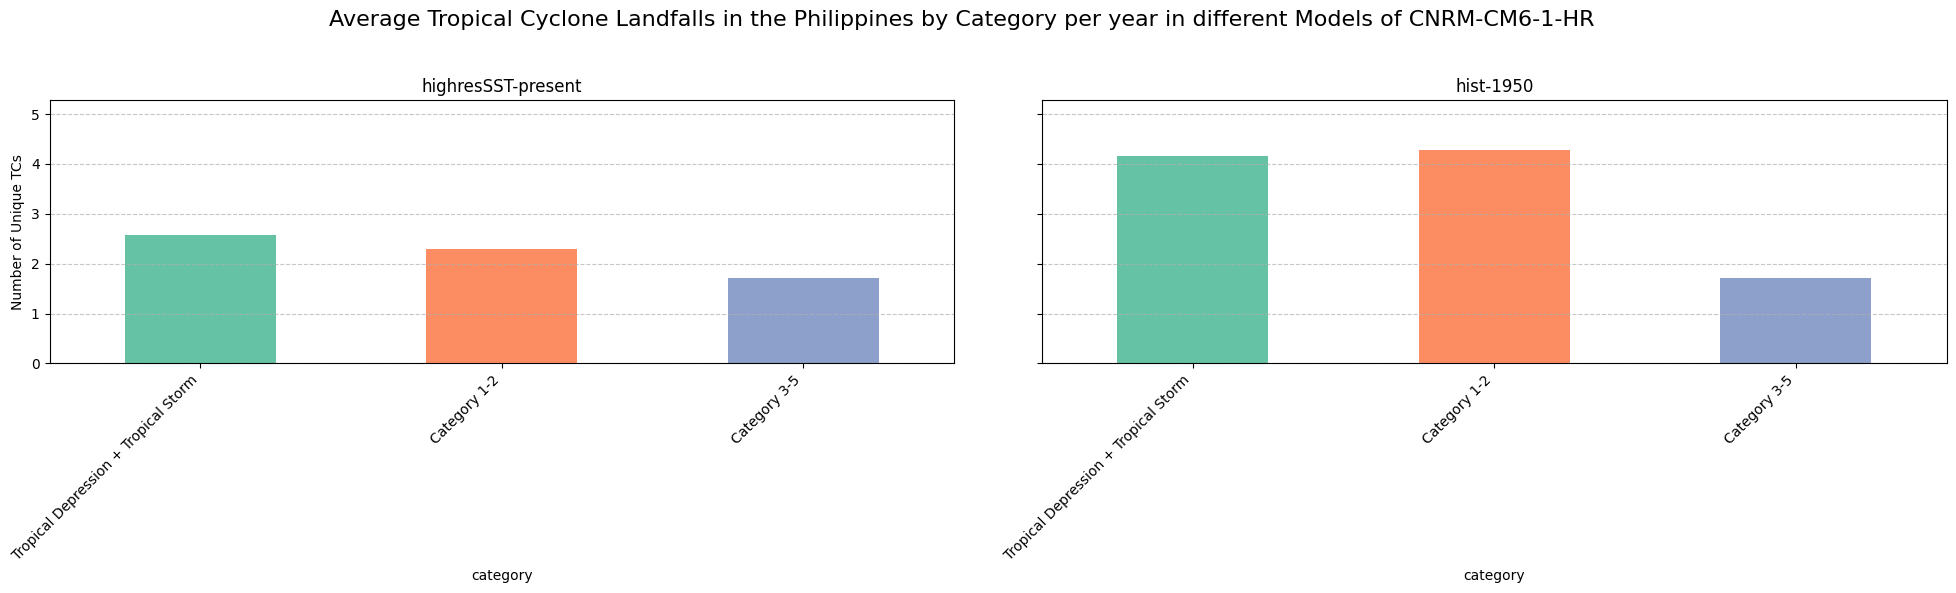

In [89]:
avg_landfall_counts_list = [
    (avg_tcs_per_year16, "highresSST-present"),
    (avg_tcs_per_year17, "hist-1950")
]

# Create subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(20, 6), sharey=True)

# Colors for consistency across subplots
colors = ['#66c2a5', '#fc8d62', '#8da0cb']

# Find the maximum y value for consistent y-axis limits
max_y = max([counts.max() for counts, _ in avg_landfall_counts_list])

# Plot each bar chart
for i, (counts, label) in enumerate(avg_landfall_counts_list):
    counts.plot(kind='bar', ax=axes[i], color=colors)
    axes[i].set_title(label)
    axes[i].set_ylabel('Number of Unique TCs' if i == 0 else '')
    axes[i].set_xticklabels(counts.index, rotation=45, ha='right')
    axes[i].set_ylim(0, max_y + 1)  # Consistent y-axis limits
    axes[i].grid(axis='y', linestyle='--', alpha=0.7)

# Add a super title
plt.suptitle('Average Tropical Cyclone Landfalls in the Philippines by Category per year in different Models of CNRM-CM6-1-HR', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust for suptitle
plt.show()

In [90]:
# Save data to CSV
data = []
categories = [
    "Tropical Depression + Tropical Storm",
    "Category 1-2",
    "Category 3-5"
]

for dataset, counts, avg in [
    ("highresSST-present", landfall_counts16, avg_tcs_per_year16),
    ("hist-1950", landfall_counts17, avg_tcs_per_year17)
]:
    for category in categories:
        data.append({
            'Dataset': dataset,
            'Category': category,
            'Total_Count': counts.get(category, 0),
            'Average_Per_Year': avg.get(category, 0)
        })
df = pd.DataFrame(data)
df.to_csv('Result of CNRM-CM6-1-HR.csv', index=False)
print("\nData saved to 'Result of CNRM-CM6-1-HR.csv' ")


Data saved to 'Result of CNRM-CM6-1-HR.csv' 


# **!As the TempExt and TRACK using same file name, avoid duplicate so i will open new collab to do the highresSST-present and hist-1950 of TRACK!**